In [1]:
import torch
import ultralytics
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
from tqdm import tqdm
import os
from inference import get_model

[08/25/24 14:46:24] WARNING  Your inference package version 0.16.3 is out of date! Please upgrade to ]8;id=303701;file:///home/mikolaj/.cache/pypoetry/virtualenvs/football-players-tracker-fAbmbwS1-py3.10/lib/python3.10/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=804016;file:///home/mikolaj/.cache/pypoetry/virtualenvs/football-players-tracker-fAbmbwS1-py3.10/lib/python3.10/site-packages/inference/core/__init__.py#35\35]8;;\
                             version 0.16.2 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [2]:
model = YOLO("../models/yolov8x_transfer_based_model.pt")


In [3]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path="../models/best.pt", force_reload=True) 
# model.conf = 0.3

In [4]:
%matplotlib inline


In [3]:

os.environ['ONNXRUNTIME-EXECUTION-PROVIDERS'] = '[CUDAExecutionProvider]'

In [4]:
SOURCE_VIDEO_PATH = "../test_videos/121364_0.mp4"
TARGET_VIDEO_PATH = "../result_videos/121364_0_result_1.mp4"


## Players detection

In [14]:

box_annotator = sv.BoxAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex("#000000")
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

        frame_tensor = torch.from_numpy(frame).to(device)

        result = model(frame, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(result)


        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections["class_name"], detections.confidence)
        ]

        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(annotated_frame, detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
        video_sink.write_frame(annotated_frame)



  0%|                                                   | 0/750 [00:00<?, ?it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 316.5ms
Speed: 7.9ms preprocess, 316.5ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  0%|                                           | 1/750 [00:00<05:22,  2.32it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 317.8ms
Speed: 7.6ms preprocess, 317.8ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  0%|                                           | 2/750 [00:00<04:49,  2.58it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 307.9ms
Speed: 8.3ms preprocess, 307.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  0%|▏                                          | 3/750 [00:01<04:35,  2.71it/s]


0: 736x1280 1 ball, 2 goalkeepers, 20 players, 2 referees, 305.4ms
Speed: 6.1ms preprocess, 305.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▏                                          | 4/750 [00:01<04:26,  2.80it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.9ms
Speed: 6.2ms preprocess, 301.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▎                                          | 5/750 [00:01<04:20,  2.86it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.0ms
Speed: 6.4ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▎                                          | 6/750 [00:02<04:16,  2.90it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.8ms preprocess, 303.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▍                                          | 7/750 [00:02<04:14,  2.92it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.5ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▍                                          | 8/750 [00:02<04:12,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 303.6ms
Speed: 6.3ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▌                                          | 9/750 [00:03<04:10,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 311.4ms
Speed: 6.2ms preprocess, 311.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▌                                         | 10/750 [00:03<04:11,  2.94it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 301.0ms
Speed: 6.2ms preprocess, 301.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  1%|▌                                         | 11/750 [00:03<04:09,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 311.8ms
Speed: 6.5ms preprocess, 311.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▋                                         | 12/750 [00:04<04:11,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 6.6ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▋                                         | 13/750 [00:04<04:10,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.1ms
Speed: 6.7ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▊                                         | 14/750 [00:04<04:09,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 303.0ms
Speed: 6.3ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▊                                         | 15/750 [00:05<04:08,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 304.3ms
Speed: 6.2ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▉                                         | 16/750 [00:05<04:07,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 309.3ms
Speed: 6.5ms preprocess, 309.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  2%|▉                                         | 17/750 [00:05<04:08,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.4ms
Speed: 6.8ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  2%|█                                         | 18/750 [00:06<04:07,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 310.5ms
Speed: 6.5ms preprocess, 310.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█                                         | 19/750 [00:06<04:08,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.7ms
Speed: 6.5ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█                                         | 20/750 [00:06<04:07,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 302.6ms
Speed: 7.2ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▏                                        | 21/750 [00:07<04:06,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 307.8ms
Speed: 7.0ms preprocess, 307.8ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▏                                        | 22/750 [00:07<04:07,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 22 players, 1 referee, 304.2ms
Speed: 6.2ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▎                                        | 23/750 [00:07<04:05,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 22 players, 2 referees, 308.1ms
Speed: 6.8ms preprocess, 308.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▎                                        | 24/750 [00:08<04:06,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 303.1ms
Speed: 6.3ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▍                                        | 25/750 [00:08<04:05,  2.95it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.1ms
Speed: 6.5ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  3%|█▍                                        | 26/750 [00:08<04:04,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.5ms
Speed: 6.2ms preprocess, 302.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▌                                        | 27/750 [00:09<04:03,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 310.6ms
Speed: 6.5ms preprocess, 310.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▌                                        | 28/750 [00:09<04:04,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 309.0ms
Speed: 6.9ms preprocess, 309.0ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▌                                        | 29/750 [00:09<04:04,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 311.0ms
Speed: 6.9ms preprocess, 311.0ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▋                                        | 30/750 [00:10<04:05,  2.93it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 307.7ms
Speed: 5.9ms preprocess, 307.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▋                                        | 31/750 [00:10<04:04,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 314.6ms
Speed: 6.8ms preprocess, 314.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▊                                        | 32/750 [00:10<04:06,  2.92it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 308.4ms
Speed: 6.4ms preprocess, 308.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  4%|█▊                                        | 33/750 [00:11<04:05,  2.91it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 310.5ms
Speed: 6.3ms preprocess, 310.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  5%|█▉                                        | 34/750 [00:11<04:05,  2.92it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 314.6ms
Speed: 6.8ms preprocess, 314.6ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


  5%|█▉                                        | 35/750 [00:11<04:05,  2.91it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 313.3ms
Speed: 6.3ms preprocess, 313.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██                                        | 36/750 [00:12<04:05,  2.91it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 310.8ms
Speed: 6.6ms preprocess, 310.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██                                        | 37/750 [00:12<04:05,  2.91it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.3ms
Speed: 7.0ms preprocess, 301.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██▏                                       | 38/750 [00:13<04:02,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.9ms
Speed: 6.3ms preprocess, 301.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██▏                                       | 39/750 [00:13<04:00,  2.95it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 310.8ms
Speed: 7.3ms preprocess, 310.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██▏                                       | 40/750 [00:13<04:01,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.2ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  5%|██▎                                       | 41/750 [00:14<04:00,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▎                                       | 42/750 [00:14<03:59,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 301.6ms
Speed: 7.1ms preprocess, 301.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▍                                       | 43/750 [00:14<03:58,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.2ms
Speed: 6.9ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▍                                       | 44/750 [00:15<03:57,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 308.6ms
Speed: 6.7ms preprocess, 308.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▌                                       | 45/750 [00:15<03:58,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 309.1ms
Speed: 6.0ms preprocess, 309.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▌                                       | 46/750 [00:15<03:58,  2.95it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.8ms preprocess, 303.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▋                                       | 47/750 [00:16<03:57,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.8ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  6%|██▋                                       | 48/750 [00:16<03:56,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.8ms preprocess, 303.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  7%|██▋                                       | 49/750 [00:16<03:56,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 299.8ms
Speed: 6.4ms preprocess, 299.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  7%|██▊                                       | 50/750 [00:17<03:54,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.6ms preprocess, 303.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  7%|██▊                                       | 51/750 [00:17<03:55,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 310.3ms
Speed: 6.6ms preprocess, 310.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  7%|██▉                                       | 52/750 [00:17<03:56,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 312.4ms
Speed: 6.2ms preprocess, 312.4ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


  7%|██▉                                       | 53/750 [00:18<03:57,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.6ms
Speed: 7.0ms preprocess, 305.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  7%|███                                       | 54/750 [00:18<03:56,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 310.1ms
Speed: 6.4ms preprocess, 310.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  7%|███                                       | 55/750 [00:18<03:56,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 309.4ms
Speed: 6.8ms preprocess, 309.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


  7%|███▏                                      | 56/750 [00:19<03:56,  2.93it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.3ms
Speed: 6.2ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▏                                      | 57/750 [00:19<03:55,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 309.5ms
Speed: 6.7ms preprocess, 309.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▏                                      | 58/750 [00:19<03:55,  2.94it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 7.0ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▎                                      | 59/750 [00:20<03:54,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.9ms
Speed: 6.4ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▎                                      | 60/750 [00:20<03:53,  2.95it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 301.4ms
Speed: 6.2ms preprocess, 301.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▍                                      | 61/750 [00:20<03:52,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.9ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▍                                      | 62/750 [00:21<03:51,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.5ms
Speed: 6.4ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  8%|███▌                                      | 63/750 [00:21<03:51,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 312.1ms
Speed: 7.0ms preprocess, 312.1ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▌                                      | 64/750 [00:21<03:52,  2.95it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.2ms
Speed: 6.4ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▋                                      | 65/750 [00:22<03:51,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▋                                      | 66/750 [00:22<03:49,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.7ms
Speed: 6.9ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▊                                      | 67/750 [00:22<03:49,  2.98it/s]


0: 736x1280 1 goalkeeper, 22 players, 3 referees, 304.0ms
Speed: 6.9ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▊                                      | 68/750 [00:23<03:49,  2.98it/s]


0: 736x1280 22 players, 1 referee, 302.7ms
Speed: 7.0ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▊                                      | 69/750 [00:23<03:48,  2.98it/s]


0: 736x1280 21 players, 2 referees, 303.2ms
Speed: 6.1ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▉                                      | 70/750 [00:23<03:47,  2.99it/s]


0: 736x1280 21 players, 2 referees, 306.0ms
Speed: 6.9ms preprocess, 306.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


  9%|███▉                                      | 71/750 [00:24<03:48,  2.97it/s]


0: 736x1280 20 players, 3 referees, 300.9ms
Speed: 6.0ms preprocess, 300.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████                                      | 72/750 [00:24<03:46,  2.99it/s]


0: 736x1280 20 players, 2 referees, 304.9ms
Speed: 6.0ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████                                      | 73/750 [00:24<03:47,  2.98it/s]


0: 736x1280 20 players, 2 referees, 303.9ms
Speed: 6.7ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████▏                                     | 74/750 [00:25<03:47,  2.97it/s]


0: 736x1280 21 players, 2 referees, 302.7ms
Speed: 6.9ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████▏                                     | 75/750 [00:25<03:46,  2.98it/s]


0: 736x1280 20 players, 2 referees, 300.8ms
Speed: 6.8ms preprocess, 300.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████▎                                     | 76/750 [00:25<03:45,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 301.9ms
Speed: 7.0ms preprocess, 301.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████▎                                     | 77/750 [00:26<03:44,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.4ms
Speed: 7.5ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 10%|████▎                                     | 78/750 [00:26<03:45,  2.98it/s]


0: 736x1280 21 players, 2 referees, 303.7ms
Speed: 6.0ms preprocess, 303.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▍                                     | 79/750 [00:26<03:44,  2.98it/s]


0: 736x1280 20 players, 2 referees, 305.9ms
Speed: 7.0ms preprocess, 305.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▍                                     | 80/750 [00:27<03:44,  2.98it/s]


0: 736x1280 20 players, 2 referees, 302.7ms
Speed: 6.6ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▌                                     | 81/750 [00:27<03:44,  2.98it/s]


0: 736x1280 20 players, 2 referees, 301.7ms
Speed: 6.3ms preprocess, 301.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▌                                     | 82/750 [00:27<03:43,  2.98it/s]


0: 736x1280 20 players, 2 referees, 304.1ms
Speed: 6.4ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▋                                     | 83/750 [00:28<03:43,  2.98it/s]


0: 736x1280 21 players, 1 referee, 302.5ms
Speed: 6.4ms preprocess, 302.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▋                                     | 84/750 [00:28<03:43,  2.99it/s]


0: 736x1280 22 players, 1 referee, 305.3ms
Speed: 6.4ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▊                                     | 85/750 [00:28<03:43,  2.98it/s]


0: 736x1280 21 players, 2 referees, 304.8ms
Speed: 6.7ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 11%|████▊                                     | 86/750 [00:29<03:42,  2.98it/s]


0: 736x1280 20 players, 2 referees, 303.2ms
Speed: 6.9ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 12%|████▊                                     | 87/750 [00:29<03:42,  2.98it/s]


0: 736x1280 21 players, 2 referees, 301.6ms
Speed: 6.8ms preprocess, 301.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 12%|████▉                                     | 88/750 [00:29<03:42,  2.98it/s]


0: 736x1280 21 players, 1 referee, 302.9ms
Speed: 6.0ms preprocess, 302.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 12%|████▉                                     | 89/750 [00:30<03:42,  2.98it/s]


0: 736x1280 21 players, 2 referees, 303.5ms
Speed: 6.3ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█████                                     | 90/750 [00:30<03:41,  2.98it/s]


0: 736x1280 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█████                                     | 91/750 [00:30<03:41,  2.98it/s]


0: 736x1280 22 players, 2 referees, 303.5ms
Speed: 6.7ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█████▏                                    | 92/750 [00:31<03:40,  2.98it/s]


0: 736x1280 22 players, 2 referees, 302.7ms
Speed: 6.4ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 12%|█████▏                                    | 93/750 [00:31<03:40,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.7ms
Speed: 6.9ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▎                                    | 94/750 [00:31<03:39,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.0ms
Speed: 7.0ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▎                                    | 95/750 [00:32<03:39,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.0ms
Speed: 6.5ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▍                                    | 96/750 [00:32<03:39,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.8ms
Speed: 6.2ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▍                                    | 97/750 [00:32<03:38,  2.98it/s]


0: 736x1280 20 players, 2 referees, 302.8ms
Speed: 6.4ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▍                                    | 98/750 [00:33<03:38,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.0ms
Speed: 6.1ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▌                                    | 99/750 [00:33<03:38,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.5ms
Speed: 7.1ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▍                                   | 100/750 [00:33<03:38,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.6ms
Speed: 6.5ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 13%|█████▌                                   | 101/750 [00:34<03:37,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.4ms
Speed: 6.7ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▌                                   | 102/750 [00:34<03:37,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.5ms
Speed: 6.1ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▋                                   | 103/750 [00:34<03:36,  2.98it/s]


0: 736x1280 20 players, 2 referees, 305.8ms
Speed: 6.5ms preprocess, 305.8ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▋                                   | 104/750 [00:35<03:36,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.4ms
Speed: 6.1ms preprocess, 303.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▋                                   | 105/750 [00:35<03:36,  2.97it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.0ms
Speed: 6.4ms preprocess, 301.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▊                                   | 106/750 [00:35<03:35,  2.98it/s]


0: 736x1280 20 players, 2 referees, 304.8ms
Speed: 6.9ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▊                                   | 107/750 [00:36<03:35,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.0ms
Speed: 6.7ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 14%|█████▉                                   | 108/750 [00:36<03:35,  2.98it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 303.6ms
Speed: 6.6ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 15%|█████▉                                   | 109/750 [00:36<03:35,  2.98it/s]


0: 736x1280 20 players, 2 referees, 301.9ms
Speed: 6.9ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████                                   | 110/750 [00:37<03:34,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.3ms
Speed: 6.8ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████                                   | 111/750 [00:37<03:34,  2.98it/s]


0: 736x1280 20 players, 2 referees, 301.1ms
Speed: 6.7ms preprocess, 301.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████                                   | 112/750 [00:37<03:33,  2.99it/s]


0: 736x1280 20 players, 2 referees, 301.4ms
Speed: 6.5ms preprocess, 301.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████▏                                  | 113/750 [00:38<03:32,  3.00it/s]


0: 736x1280 20 players, 2 referees, 304.4ms
Speed: 6.7ms preprocess, 304.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████▏                                  | 114/750 [00:38<03:33,  2.98it/s]


0: 736x1280 21 players, 2 referees, 300.0ms
Speed: 6.8ms preprocess, 300.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████▎                                  | 115/750 [00:38<03:32,  2.99it/s]


0: 736x1280 20 players, 2 referees, 303.0ms
Speed: 6.2ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 15%|██████▎                                  | 116/750 [00:39<03:32,  2.98it/s]


0: 736x1280 20 players, 2 referees, 303.1ms
Speed: 6.9ms preprocess, 303.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▍                                  | 117/750 [00:39<03:32,  2.98it/s]


0: 736x1280 20 players, 2 referees, 302.1ms
Speed: 6.5ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▍                                  | 118/750 [00:39<03:31,  2.99it/s]


0: 736x1280 20 players, 2 referees, 300.9ms
Speed: 6.7ms preprocess, 300.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▌                                  | 119/750 [00:40<03:30,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.2ms
Speed: 6.4ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▌                                  | 120/750 [00:40<03:30,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.4ms
Speed: 6.9ms preprocess, 304.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▌                                  | 121/750 [00:40<03:30,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.2ms
Speed: 7.1ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▋                                  | 122/750 [00:41<03:30,  2.98it/s]


0: 736x1280 21 players, 2 referees, 302.9ms
Speed: 7.3ms preprocess, 302.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 16%|██████▋                                  | 123/750 [00:41<03:30,  2.98it/s]


0: 736x1280 20 players, 2 referees, 303.6ms
Speed: 6.1ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 17%|██████▊                                  | 124/750 [00:41<03:30,  2.98it/s]


0: 736x1280 20 players, 2 referees, 302.2ms
Speed: 6.2ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 17%|██████▊                                  | 125/750 [00:42<03:29,  2.99it/s]


0: 736x1280 20 players, 2 referees, 302.7ms
Speed: 6.0ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 17%|██████▉                                  | 126/750 [00:42<03:28,  2.99it/s]


0: 736x1280 20 players, 2 referees, 303.2ms
Speed: 6.1ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 17%|██████▉                                  | 127/750 [00:42<03:28,  2.99it/s]


0: 736x1280 20 players, 2 referees, 300.2ms
Speed: 6.5ms preprocess, 300.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 17%|██████▉                                  | 128/750 [00:43<03:27,  3.00it/s]


0: 736x1280 20 players, 2 referees, 304.4ms
Speed: 6.7ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 17%|███████                                  | 129/750 [00:43<03:27,  2.99it/s]


0: 736x1280 20 players, 2 referees, 302.4ms
Speed: 7.1ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 17%|███████                                  | 130/750 [00:43<03:27,  2.99it/s]


0: 736x1280 21 players, 1 referee, 303.2ms
Speed: 6.8ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 17%|███████▏                                 | 131/750 [00:44<03:26,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.3ms
Speed: 6.7ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▏                                 | 132/750 [00:44<03:26,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.0ms
Speed: 6.6ms preprocess, 302.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▎                                 | 133/750 [00:44<03:26,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.5ms
Speed: 6.6ms preprocess, 304.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▎                                 | 134/750 [00:45<03:26,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 303.3ms
Speed: 6.9ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▍                                 | 135/750 [00:45<03:25,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 300.1ms
Speed: 6.2ms preprocess, 300.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▍                                 | 136/750 [00:45<03:25,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.4ms
Speed: 6.7ms preprocess, 301.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▍                                 | 137/750 [00:46<03:24,  3.00it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 304.7ms
Speed: 7.0ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 18%|███████▌                                 | 138/750 [00:46<03:24,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 301.4ms
Speed: 6.1ms preprocess, 301.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▌                                 | 139/750 [00:46<03:24,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 304.0ms
Speed: 6.8ms preprocess, 304.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▋                                 | 140/750 [00:47<03:24,  2.99it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 312.4ms
Speed: 6.8ms preprocess, 312.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▋                                 | 141/750 [00:47<03:26,  2.95it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 310.6ms
Speed: 6.7ms preprocess, 310.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▊                                 | 142/750 [00:47<03:26,  2.94it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 315.8ms
Speed: 6.9ms preprocess, 315.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▊                                 | 143/750 [00:48<03:27,  2.92it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 311.1ms
Speed: 6.5ms preprocess, 311.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▊                                 | 144/750 [00:48<03:27,  2.92it/s]


0: 736x1280 1 ball, 21 players, 1 referee, 311.3ms
Speed: 6.3ms preprocess, 311.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▉                                 | 145/750 [00:48<03:27,  2.92it/s]


0: 736x1280 1 ball, 23 players, 2 referees, 313.0ms
Speed: 6.6ms preprocess, 313.0ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 19%|███████▉                                 | 146/750 [00:49<03:27,  2.91it/s]


0: 736x1280 1 ball, 21 players, 309.4ms
Speed: 6.3ms preprocess, 309.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████                                 | 147/750 [00:49<03:26,  2.92it/s]


0: 736x1280 1 ball, 22 players, 310.7ms
Speed: 7.4ms preprocess, 310.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████                                 | 148/750 [00:50<03:26,  2.92it/s]


0: 736x1280 1 ball, 22 players, 312.5ms
Speed: 6.3ms preprocess, 312.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████▏                                | 149/750 [00:50<03:25,  2.92it/s]


0: 736x1280 1 ball, 23 players, 1 referee, 314.1ms
Speed: 6.4ms preprocess, 314.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████▏                                | 150/750 [00:50<03:26,  2.91it/s]


0: 736x1280 1 ball, 23 players, 1 referee, 308.9ms
Speed: 6.8ms preprocess, 308.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████▎                                | 151/750 [00:51<03:25,  2.92it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 313.0ms
Speed: 6.1ms preprocess, 313.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████▎                                | 152/750 [00:51<03:25,  2.91it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 305.0ms
Speed: 6.9ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 20%|████████▎                                | 153/750 [00:51<03:23,  2.93it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 308.8ms
Speed: 6.7ms preprocess, 308.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▍                                | 154/750 [00:52<03:23,  2.92it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.5ms
Speed: 6.7ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▍                                | 155/750 [00:52<03:22,  2.94it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 303.0ms
Speed: 6.9ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▌                                | 156/750 [00:52<03:20,  2.96it/s]


0: 736x1280 1 ball, 23 players, 2 referees, 301.9ms
Speed: 6.9ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▌                                | 157/750 [00:53<03:19,  2.97it/s]


0: 736x1280 22 players, 1 referee, 303.6ms
Speed: 6.7ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▋                                | 158/750 [00:53<03:19,  2.97it/s]


0: 736x1280 1 ball, 21 players, 1 referee, 303.0ms
Speed: 6.2ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▋                                | 159/750 [00:53<03:18,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.0ms
Speed: 6.3ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▋                                | 160/750 [00:54<03:17,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.7ms
Speed: 6.1ms preprocess, 303.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 21%|████████▊                                | 161/750 [00:54<03:17,  2.98it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 302.3ms
Speed: 6.4ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 22%|████████▊                                | 162/750 [00:54<03:16,  2.99it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 303.3ms
Speed: 6.0ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 22%|████████▉                                | 163/750 [00:55<03:16,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.7ms
Speed: 6.3ms preprocess, 301.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 22%|████████▉                                | 164/750 [00:55<03:16,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 22%|█████████                                | 165/750 [00:55<03:16,  2.98it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 301.1ms
Speed: 6.9ms preprocess, 301.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 22%|█████████                                | 166/750 [00:56<03:15,  2.99it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 304.5ms
Speed: 6.4ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 22%|█████████▏                               | 167/750 [00:56<03:15,  2.99it/s]


0: 736x1280 1 ball, 20 players, 1 referee, 303.8ms
Speed: 6.9ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 22%|█████████▏                               | 168/750 [00:56<03:15,  2.98it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 304.9ms
Speed: 6.6ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▏                               | 169/750 [00:57<03:14,  2.98it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 303.4ms
Speed: 6.2ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▎                               | 170/750 [00:57<03:14,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 306.6ms
Speed: 6.1ms preprocess, 306.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▎                               | 171/750 [00:57<03:14,  2.97it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.0ms
Speed: 6.9ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▍                               | 172/750 [00:58<03:13,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.3ms
Speed: 6.4ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▍                               | 173/750 [00:58<03:13,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.2ms
Speed: 6.6ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▌                               | 174/750 [00:58<03:12,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 302.7ms
Speed: 6.4ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▌                               | 175/750 [00:59<03:12,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.2ms
Speed: 6.6ms preprocess, 301.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 23%|█████████▌                               | 176/750 [00:59<03:11,  3.00it/s]


0: 736x1280 21 players, 2 referees, 302.9ms
Speed: 6.3ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▋                               | 177/750 [00:59<03:11,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.1ms
Speed: 6.6ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▋                               | 178/750 [01:00<03:11,  2.99it/s]


0: 736x1280 20 players, 2 referees, 299.4ms
Speed: 6.5ms preprocess, 299.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▊                               | 179/750 [01:00<03:10,  3.00it/s]


0: 736x1280 20 players, 2 referees, 303.3ms
Speed: 6.3ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▊                               | 180/750 [01:00<03:10,  3.00it/s]


0: 736x1280 20 players, 2 referees, 302.3ms
Speed: 6.2ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▉                               | 181/750 [01:01<03:10,  2.99it/s]


0: 736x1280 20 players, 2 referees, 301.6ms
Speed: 6.4ms preprocess, 301.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|█████████▉                               | 182/750 [01:01<03:09,  3.00it/s]


0: 736x1280 20 players, 2 referees, 301.9ms
Speed: 6.6ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 24%|██████████                               | 183/750 [01:01<03:08,  3.00it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 304.6ms
Speed: 6.6ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████                               | 184/750 [01:02<03:09,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.7ms
Speed: 6.8ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████                               | 185/750 [01:02<03:08,  2.99it/s]


0: 736x1280 20 players, 2 referees, 302.3ms
Speed: 7.1ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▏                              | 186/750 [01:02<03:08,  2.99it/s]


0: 736x1280 19 players, 2 referees, 305.3ms
Speed: 6.5ms preprocess, 305.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▏                              | 187/750 [01:03<03:08,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 301.9ms
Speed: 6.5ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▎                              | 188/750 [01:03<03:07,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.3ms
Speed: 6.0ms preprocess, 304.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▎                              | 189/750 [01:03<03:07,  2.99it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▍                              | 190/750 [01:04<03:07,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.7ms
Speed: 6.5ms preprocess, 301.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 25%|██████████▍                              | 191/750 [01:04<03:07,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.3ms
Speed: 6.4ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▍                              | 192/750 [01:04<03:06,  2.99it/s]


0: 736x1280 20 players, 2 referees, 304.2ms
Speed: 6.6ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▌                              | 193/750 [01:05<03:06,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.8ms
Speed: 6.5ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▌                              | 194/750 [01:05<03:06,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.1ms
Speed: 6.2ms preprocess, 302.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▋                              | 195/750 [01:05<03:05,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.5ms
Speed: 6.4ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▋                              | 196/750 [01:06<03:05,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.9ms
Speed: 6.7ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▊                              | 197/750 [01:06<03:05,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.5ms
Speed: 6.7ms preprocess, 301.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 26%|██████████▊                              | 198/750 [01:06<03:04,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.6ms
Speed: 6.8ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██████████▉                              | 199/750 [01:07<03:04,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.3ms
Speed: 6.9ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██████████▉                              | 200/750 [01:07<03:03,  3.00it/s]


0: 736x1280 2 balls, 19 players, 2 referees, 303.8ms
Speed: 6.8ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|██████████▉                              | 201/750 [01:07<03:03,  3.00it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.6ms
Speed: 7.0ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|███████████                              | 202/750 [01:08<03:03,  2.99it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 303.3ms
Speed: 7.1ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|███████████                              | 203/750 [01:08<03:02,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.0ms
Speed: 5.9ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 27%|███████████▏                             | 204/750 [01:08<03:02,  2.99it/s]


0: 736x1280 1 ball, 21 players, 2 referees, 304.3ms
Speed: 6.1ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|███████████▏                             | 205/750 [01:09<03:02,  2.98it/s]


0: 736x1280 1 ball, 22 players, 2 referees, 301.9ms
Speed: 6.6ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 27%|███████████▎                             | 206/750 [01:09<03:02,  2.99it/s]


0: 736x1280 1 ball, 19 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▎                             | 207/750 [01:09<03:01,  2.99it/s]


0: 736x1280 1 ball, 23 players, 2 referees, 303.0ms
Speed: 6.4ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▎                             | 208/750 [01:10<03:01,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 300.5ms
Speed: 6.2ms preprocess, 300.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▍                             | 209/750 [01:10<03:00,  2.99it/s]


0: 736x1280 1 ball, 19 players, 2 referees, 303.2ms
Speed: 6.4ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▍                             | 210/750 [01:10<03:00,  2.99it/s]


0: 736x1280 1 ball, 19 players, 2 referees, 302.2ms
Speed: 6.7ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▌                             | 211/750 [01:11<03:00,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.7ms
Speed: 6.3ms preprocess, 301.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▌                             | 212/750 [01:11<02:59,  2.99it/s]


0: 736x1280 20 players, 2 referees, 303.3ms
Speed: 6.4ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 28%|███████████▋                             | 213/750 [01:11<02:59,  2.99it/s]


0: 736x1280 20 players, 2 referees, 301.4ms
Speed: 6.8ms preprocess, 301.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▋                             | 214/750 [01:12<02:59,  2.99it/s]


0: 736x1280 19 players, 2 referees, 303.6ms
Speed: 7.2ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▊                             | 215/750 [01:12<02:58,  2.99it/s]


0: 736x1280 19 players, 2 referees, 301.8ms
Speed: 6.3ms preprocess, 301.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▊                             | 216/750 [01:12<02:58,  3.00it/s]


0: 736x1280 19 players, 2 referees, 303.8ms
Speed: 6.7ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▊                             | 217/750 [01:13<02:58,  2.99it/s]


0: 736x1280 19 players, 2 referees, 302.9ms
Speed: 6.3ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▉                             | 218/750 [01:13<02:57,  2.99it/s]


0: 736x1280 20 players, 2 referees, 304.0ms
Speed: 6.7ms preprocess, 304.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 29%|███████████▉                             | 219/750 [01:13<02:57,  2.99it/s]


0: 736x1280 20 players, 2 referees, 301.6ms
Speed: 6.2ms preprocess, 301.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 29%|████████████                             | 220/750 [01:14<02:57,  2.99it/s]


0: 736x1280 21 players, 2 referees, 301.6ms
Speed: 6.0ms preprocess, 301.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 29%|████████████                             | 221/750 [01:14<02:56,  3.00it/s]


0: 736x1280 21 players, 2 referees, 305.1ms
Speed: 6.1ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▏                            | 222/750 [01:14<02:56,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 300.7ms
Speed: 6.7ms preprocess, 300.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▏                            | 223/750 [01:15<02:56,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.3ms
Speed: 7.0ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▏                            | 224/750 [01:15<02:55,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 303.0ms
Speed: 7.2ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▎                            | 225/750 [01:15<02:56,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.3ms
Speed: 6.4ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▎                            | 226/750 [01:16<02:55,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.4ms
Speed: 6.4ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▍                            | 227/750 [01:16<02:54,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 301.6ms
Speed: 6.9ms preprocess, 301.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 30%|████████████▍                            | 228/750 [01:16<02:54,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 305.1ms
Speed: 6.5ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▌                            | 229/750 [01:17<02:54,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.2ms
Speed: 6.5ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▌                            | 230/750 [01:17<02:54,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 304.1ms
Speed: 6.5ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▋                            | 231/750 [01:17<02:54,  2.98it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 300.8ms
Speed: 6.5ms preprocess, 300.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▋                            | 232/750 [01:18<02:53,  2.99it/s]


0: 736x1280 1 ball, 20 players, 2 referees, 302.6ms
Speed: 6.3ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▋                            | 233/750 [01:18<02:52,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.2ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▊                            | 234/750 [01:18<02:52,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.8ms
Speed: 6.5ms preprocess, 301.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▊                            | 235/750 [01:19<02:52,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 31%|████████████▉                            | 236/750 [01:19<02:52,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 32%|████████████▉                            | 237/750 [01:19<02:52,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.7ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████                            | 238/750 [01:20<02:51,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.3ms
Speed: 6.8ms preprocess, 301.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████                            | 239/750 [01:20<02:50,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.8ms
Speed: 6.7ms preprocess, 301.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████                            | 240/750 [01:20<02:50,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.3ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████▏                           | 241/750 [01:21<02:50,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 3 referees, 299.8ms
Speed: 6.5ms preprocess, 299.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████▏                           | 242/750 [01:21<02:49,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.7ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 32%|█████████████▎                           | 243/750 [01:21<02:49,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.5ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▎                           | 244/750 [01:22<02:48,  3.00it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.4ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▍                           | 245/750 [01:22<02:48,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.8ms
Speed: 6.0ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▍                           | 246/750 [01:22<02:48,  3.00it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.2ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▌                           | 247/750 [01:23<02:48,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.4ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▌                           | 248/750 [01:23<02:48,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 5.9ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▌                           | 249/750 [01:23<02:47,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.4ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▋                           | 250/750 [01:24<02:47,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 300.9ms
Speed: 6.6ms preprocess, 300.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 33%|█████████████▋                           | 251/750 [01:24<02:46,  2.99it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 304.9ms
Speed: 6.6ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 34%|█████████████▊                           | 252/750 [01:24<02:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 303.6ms
Speed: 6.4ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 34%|█████████████▊                           | 253/750 [01:25<02:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.9ms
Speed: 6.2ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 34%|█████████████▉                           | 254/750 [01:25<02:46,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 6.1ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 34%|█████████████▉                           | 255/750 [01:25<02:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.1ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 34%|█████████████▉                           | 256/750 [01:26<02:45,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.2ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 34%|██████████████                           | 257/750 [01:26<02:45,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.2ms
Speed: 6.6ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 34%|██████████████                           | 258/750 [01:26<02:45,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.4ms preprocess, 304.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▏                          | 259/750 [01:27<02:44,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.3ms
Speed: 6.7ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▏                          | 260/750 [01:27<02:44,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.6ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▎                          | 261/750 [01:27<02:44,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.8ms
Speed: 6.2ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▎                          | 262/750 [01:28<02:43,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.0ms
Speed: 6.3ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▍                          | 263/750 [01:28<02:43,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▍                          | 264/750 [01:28<02:43,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.8ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▍                          | 265/750 [01:29<02:42,  2.98it/s]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 301.1ms
Speed: 6.6ms preprocess, 301.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 35%|██████████████▌                          | 266/750 [01:29<02:42,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.7ms
Speed: 6.3ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▌                          | 267/750 [01:29<02:41,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 305.6ms
Speed: 6.5ms preprocess, 305.6ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▋                          | 268/750 [01:30<02:42,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 7.1ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▋                          | 269/750 [01:30<02:41,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.4ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▊                          | 270/750 [01:30<02:41,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▊                          | 271/750 [01:31<02:40,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.3ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▊                          | 272/750 [01:31<02:40,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 301.9ms
Speed: 6.3ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 36%|██████████████▉                          | 273/750 [01:31<02:40,  2.98it/s]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.5ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|██████████████▉                          | 274/750 [01:32<02:39,  2.98it/s]


0: 736x1280 2 balls, 1 goalkeeper, 21 players, 1 referee, 302.0ms
Speed: 6.8ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████                          | 275/750 [01:32<02:39,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 7.0ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████                          | 276/750 [01:32<02:38,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.4ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████▏                         | 277/750 [01:33<02:38,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████▏                         | 278/750 [01:33<02:38,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.7ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████▎                         | 279/750 [01:33<02:37,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.5ms
Speed: 6.9ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████▎                         | 280/750 [01:34<02:37,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.0ms
Speed: 6.7ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 37%|███████████████▎                         | 281/750 [01:34<02:37,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.8ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▍                         | 282/750 [01:34<02:37,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.3ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▍                         | 283/750 [01:35<02:36,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.2ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▌                         | 284/750 [01:35<02:36,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.7ms
Speed: 6.3ms preprocess, 301.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▌                         | 285/750 [01:35<02:35,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 303.9ms
Speed: 6.5ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▋                         | 286/750 [01:36<02:35,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 303.6ms
Speed: 6.3ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▋                         | 287/750 [01:36<02:35,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 38%|███████████████▋                         | 288/750 [01:36<02:35,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.0ms
Speed: 6.3ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███████████████▊                         | 289/750 [01:37<02:34,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.8ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███████████████▊                         | 290/750 [01:37<02:34,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.5ms
Speed: 6.1ms preprocess, 302.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███████████████▉                         | 291/750 [01:37<02:33,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.5ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|███████████████▉                         | 292/750 [01:38<02:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.1ms
Speed: 6.0ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|████████████████                         | 293/750 [01:38<02:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 7.2ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 39%|████████████████                         | 294/750 [01:38<02:33,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.3ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 39%|████████████████▏                        | 295/750 [01:39<02:33,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.9ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 39%|████████████████▏                        | 296/750 [01:39<02:32,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.2ms
Speed: 6.5ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▏                        | 297/750 [01:39<02:32,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.8ms
Speed: 6.6ms preprocess, 301.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▎                        | 298/750 [01:40<02:31,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.4ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▎                        | 299/750 [01:40<02:31,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.5ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▍                        | 300/750 [01:40<02:31,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.9ms
Speed: 6.4ms preprocess, 301.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▍                        | 301/750 [01:41<02:30,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.1ms
Speed: 6.2ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▌                        | 302/750 [01:41<02:30,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 300.9ms
Speed: 6.6ms preprocess, 300.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 40%|████████████████▌                        | 303/750 [01:41<02:29,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▌                        | 304/750 [01:42<02:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.7ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▋                        | 305/750 [01:42<02:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 5.8ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▋                        | 306/750 [01:42<02:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.4ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▊                        | 307/750 [01:43<02:28,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.1ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▊                        | 308/750 [01:43<02:28,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.2ms
Speed: 6.5ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▉                        | 309/750 [01:43<02:27,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.2ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 41%|████████████████▉                        | 310/750 [01:44<02:27,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.6ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 41%|█████████████████                        | 311/750 [01:44<02:27,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████                        | 312/750 [01:44<02:27,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.3ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████                        | 313/750 [01:45<02:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.8ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████▏                       | 314/750 [01:45<02:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.3ms
Speed: 6.4ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████▏                       | 315/750 [01:46<02:25,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.2ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████▎                       | 316/750 [01:46<02:25,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.3ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████▎                       | 317/750 [01:46<02:25,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 42%|█████████████████▍                       | 318/750 [01:47<02:25,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 301.2ms
Speed: 6.4ms preprocess, 301.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▍                       | 319/750 [01:47<02:24,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.8ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▍                       | 320/750 [01:47<02:24,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▌                       | 321/750 [01:48<02:24,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.0ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▌                       | 322/750 [01:48<02:23,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.8ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▋                       | 323/750 [01:48<02:23,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.1ms
Speed: 6.4ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▋                       | 324/750 [01:49<02:22,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.3ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▊                       | 325/750 [01:49<02:22,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.4ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 43%|█████████████████▊                       | 326/750 [01:49<02:22,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.7ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 44%|█████████████████▉                       | 327/750 [01:50<02:21,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.8ms
Speed: 6.3ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 44%|█████████████████▉                       | 328/750 [01:50<02:21,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.8ms
Speed: 6.2ms preprocess, 301.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 44%|█████████████████▉                       | 329/750 [01:50<02:20,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 7.2ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 44%|██████████████████                       | 330/750 [01:51<02:20,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.7ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 44%|██████████████████                       | 331/750 [01:51<02:20,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.7ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 44%|██████████████████▏                      | 332/750 [01:51<02:19,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 6.0ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 44%|██████████████████▏                      | 333/750 [01:52<02:19,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.8ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▎                      | 334/750 [01:52<02:19,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.5ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▎                      | 335/750 [01:52<02:19,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.5ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▎                      | 336/750 [01:53<02:18,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▍                      | 337/750 [01:53<02:18,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 5.9ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▍                      | 338/750 [01:53<02:17,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.8ms
Speed: 6.2ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▌                      | 339/750 [01:54<02:17,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.8ms
Speed: 6.7ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▌                      | 340/750 [01:54<02:17,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.5ms
Speed: 6.2ms preprocess, 305.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 45%|██████████████████▋                      | 341/750 [01:54<02:17,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.4ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▋                      | 342/750 [01:55<02:17,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▊                      | 343/750 [01:55<02:16,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.4ms preprocess, 304.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▊                      | 344/750 [01:55<02:16,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.9ms
Speed: 6.1ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▊                      | 345/750 [01:56<02:16,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.9ms
Speed: 6.4ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▉                      | 346/750 [01:56<02:15,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 303.9ms
Speed: 6.4ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|██████████████████▉                      | 347/750 [01:56<02:15,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.7ms
Speed: 6.3ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 46%|███████████████████                      | 348/750 [01:57<02:15,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 305.9ms
Speed: 6.4ms preprocess, 305.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████                      | 349/750 [01:57<02:15,  2.97it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 302.5ms
Speed: 6.8ms preprocess, 302.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▏                     | 350/750 [01:57<02:14,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.2ms
Speed: 6.5ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▏                     | 351/750 [01:58<02:13,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 302.4ms
Speed: 6.7ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▏                     | 352/750 [01:58<02:13,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 301.5ms
Speed: 6.4ms preprocess, 301.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▎                     | 353/750 [01:58<02:12,  3.00it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 303.9ms
Speed: 6.3ms preprocess, 303.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▎                     | 354/750 [01:59<02:12,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.6ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▍                     | 355/750 [01:59<02:12,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 303.4ms
Speed: 6.9ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 47%|███████████████████▍                     | 356/750 [01:59<02:12,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.2ms
Speed: 6.0ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▌                     | 357/750 [02:00<02:11,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 308.0ms
Speed: 6.4ms preprocess, 308.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▌                     | 358/750 [02:00<02:12,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.6ms
Speed: 7.0ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▋                     | 359/750 [02:00<02:11,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.7ms
Speed: 6.8ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▋                     | 360/750 [02:01<02:11,  2.97it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 302.6ms
Speed: 6.5ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▋                     | 361/750 [02:01<02:10,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.7ms
Speed: 6.1ms preprocess, 301.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▊                     | 362/750 [02:01<02:09,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.6ms
Speed: 6.4ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 48%|███████████████████▊                     | 363/750 [02:02<02:09,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.3ms
Speed: 6.1ms preprocess, 304.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 49%|███████████████████▉                     | 364/750 [02:02<02:09,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 301.7ms
Speed: 6.2ms preprocess, 301.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 49%|███████████████████▉                     | 365/750 [02:02<02:08,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.7ms
Speed: 6.5ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████                     | 366/750 [02:03<02:08,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.3ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████                     | 367/750 [02:03<02:08,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 300.8ms
Speed: 6.7ms preprocess, 300.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████                     | 368/750 [02:03<02:07,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.6ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████▏                    | 369/750 [02:04<02:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.9ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████▏                    | 370/750 [02:04<02:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.8ms preprocess, 304.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 49%|████████████████████▎                    | 371/750 [02:04<02:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 301.8ms
Speed: 6.1ms preprocess, 301.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▎                    | 372/750 [02:05<02:06,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 302.9ms
Speed: 6.0ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▍                    | 373/750 [02:05<02:06,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.5ms
Speed: 6.3ms preprocess, 302.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▍                    | 374/750 [02:05<02:05,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.8ms
Speed: 6.5ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▌                    | 375/750 [02:06<02:05,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▌                    | 376/750 [02:06<02:05,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.4ms
Speed: 6.1ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▌                    | 377/750 [02:06<02:05,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 302.5ms
Speed: 6.8ms preprocess, 302.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 50%|████████████████████▋                    | 378/750 [02:07<02:04,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 300.0ms
Speed: 6.7ms preprocess, 300.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▋                    | 379/750 [02:07<02:03,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.1ms
Speed: 6.7ms preprocess, 302.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▊                    | 380/750 [02:07<02:03,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.9ms
Speed: 6.2ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▊                    | 381/750 [02:08<02:03,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 300.0ms
Speed: 6.3ms preprocess, 300.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▉                    | 382/750 [02:08<02:02,  3.00it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 301.2ms
Speed: 6.7ms preprocess, 301.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▉                    | 383/750 [02:08<02:02,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 303.1ms
Speed: 6.8ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|████████████████████▉                    | 384/750 [02:09<02:02,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 51%|█████████████████████                    | 385/750 [02:09<02:02,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 302.8ms
Speed: 6.4ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 51%|█████████████████████                    | 386/750 [02:09<02:01,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.6ms
Speed: 6.3ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▏                   | 387/750 [02:10<02:01,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 303.9ms
Speed: 6.5ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▏                   | 388/750 [02:10<02:01,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 6.3ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▎                   | 389/750 [02:10<02:01,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.9ms preprocess, 303.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▎                   | 390/750 [02:11<02:00,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▎                   | 391/750 [02:11<02:00,  2.98it/s]


0: 736x1280 1 ball, 2 goalkeepers, 20 players, 2 referees, 302.0ms
Speed: 6.6ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▍                   | 392/750 [02:11<01:59,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 300.8ms
Speed: 6.2ms preprocess, 300.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 52%|█████████████████████▍                   | 393/750 [02:12<01:59,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.0ms
Speed: 6.0ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▌                   | 394/750 [02:12<01:59,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.5ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▌                   | 395/750 [02:12<01:58,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.8ms preprocess, 304.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▋                   | 396/750 [02:13<01:58,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.1ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▋                   | 397/750 [02:13<01:58,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▊                   | 398/750 [02:13<01:58,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.2ms
Speed: 6.4ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▊                   | 399/750 [02:14<01:57,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.5ms
Speed: 6.8ms preprocess, 304.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▊                   | 400/750 [02:14<01:57,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.8ms
Speed: 6.5ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 53%|█████████████████████▉                   | 401/750 [02:14<01:57,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.4ms
Speed: 6.2ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 54%|█████████████████████▉                   | 402/750 [02:15<01:57,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.5ms
Speed: 6.5ms preprocess, 305.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████                   | 403/750 [02:15<01:56,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 308.8ms
Speed: 6.5ms preprocess, 308.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████                   | 404/750 [02:15<01:56,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.3ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████▏                  | 405/750 [02:16<01:56,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.7ms preprocess, 304.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████▏                  | 406/750 [02:16<01:55,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.3ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████▏                  | 407/750 [02:16<01:55,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.7ms preprocess, 304.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 54%|██████████████████████▎                  | 408/750 [02:17<01:54,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.9ms
Speed: 6.3ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▎                  | 409/750 [02:17<01:54,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▍                  | 410/750 [02:17<01:54,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.9ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▍                  | 411/750 [02:18<01:53,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.9ms
Speed: 6.5ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▌                  | 412/750 [02:18<01:53,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.5ms
Speed: 6.2ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▌                  | 413/750 [02:18<01:53,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▋                  | 414/750 [02:19<01:52,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.3ms preprocess, 304.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▋                  | 415/750 [02:19<01:52,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.1ms
Speed: 6.2ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 55%|██████████████████████▋                  | 416/750 [02:19<01:52,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.2ms
Speed: 6.3ms preprocess, 305.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 56%|██████████████████████▊                  | 417/750 [02:20<01:51,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.4ms
Speed: 6.7ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 56%|██████████████████████▊                  | 418/750 [02:20<01:51,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 3 referees, 305.8ms
Speed: 6.5ms preprocess, 305.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 56%|██████████████████████▉                  | 419/750 [02:20<01:51,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.4ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 56%|██████████████████████▉                  | 420/750 [02:21<01:50,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.5ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 56%|███████████████████████                  | 421/750 [02:21<01:50,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 5.9ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 56%|███████████████████████                  | 422/750 [02:21<01:49,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.4ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 56%|███████████████████████                  | 423/750 [02:22<01:49,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.6ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▏                 | 424/750 [02:22<01:49,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.2ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▏                 | 425/750 [02:22<01:48,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.1ms
Speed: 6.5ms preprocess, 302.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▎                 | 426/750 [02:23<01:48,  2.99it/s]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.7ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▎                 | 427/750 [02:23<01:48,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.7ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▍                 | 428/750 [02:23<01:47,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.5ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▍                 | 429/750 [02:24<01:47,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.6ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▌                 | 430/750 [02:24<01:47,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.0ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 57%|███████████████████████▌                 | 431/750 [02:24<01:47,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▌                 | 432/750 [02:25<01:46,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.7ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▋                 | 433/750 [02:25<01:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.7ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▋                 | 434/750 [02:25<01:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.1ms
Speed: 6.7ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▊                 | 435/750 [02:26<01:45,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 7.1ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▊                 | 436/750 [02:26<01:45,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.6ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▉                 | 437/750 [02:26<01:45,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.4ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 58%|███████████████████████▉                 | 438/750 [02:27<01:44,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.0ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 59%|███████████████████████▉                 | 439/750 [02:27<01:44,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 306.8ms
Speed: 6.5ms preprocess, 306.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████                 | 440/750 [02:27<01:44,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.0ms
Speed: 6.7ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████                 | 441/750 [02:28<01:43,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████▏                | 442/750 [02:28<01:43,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.8ms
Speed: 6.6ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████▏                | 443/750 [02:28<01:42,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████▎                | 444/750 [02:29<01:42,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.6ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████▎                | 445/750 [02:29<01:42,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.4ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 59%|████████████████████████▍                | 446/750 [02:29<01:41,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.7ms
Speed: 6.2ms preprocess, 305.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▍                | 447/750 [02:30<01:41,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 22 players, 2 referees, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▍                | 448/750 [02:30<01:41,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.5ms
Speed: 6.1ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▌                | 449/750 [02:30<01:41,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.9ms
Speed: 6.7ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▌                | 450/750 [02:31<01:40,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.4ms
Speed: 6.3ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▋                | 451/750 [02:31<01:40,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.5ms
Speed: 6.7ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▋                | 452/750 [02:31<01:40,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.3ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 60%|████████████████████████▊                | 453/750 [02:32<01:39,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.8ms
Speed: 6.0ms preprocess, 305.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 61%|████████████████████████▊                | 454/750 [02:32<01:39,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.8ms
Speed: 6.5ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 61%|████████████████████████▊                | 455/750 [02:32<01:39,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.4ms
Speed: 6.7ms preprocess, 302.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 61%|████████████████████████▉                | 456/750 [02:33<01:38,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 304.6ms
Speed: 6.3ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 61%|████████████████████████▉                | 457/750 [02:33<01:38,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.1ms
Speed: 6.3ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 61%|█████████████████████████                | 458/750 [02:33<01:38,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 303.6ms
Speed: 6.3ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 61%|█████████████████████████                | 459/750 [02:34<01:37,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 4 referees, 302.5ms
Speed: 6.2ms preprocess, 302.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 61%|█████████████████████████▏               | 460/750 [02:34<01:37,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 61%|█████████████████████████▏               | 461/750 [02:34<01:36,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 6.3ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▎               | 462/750 [02:35<01:36,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.8ms
Speed: 6.4ms preprocess, 305.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▎               | 463/750 [02:35<01:36,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.3ms
Speed: 6.9ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▎               | 464/750 [02:35<01:36,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▍               | 465/750 [02:36<01:35,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.5ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▍               | 466/750 [02:36<01:35,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.3ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▌               | 467/750 [02:36<01:35,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.8ms
Speed: 6.3ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 62%|█████████████████████████▌               | 468/750 [02:37<01:34,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▋               | 469/750 [02:37<01:34,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.6ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▋               | 470/750 [02:37<01:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 305.0ms
Speed: 6.6ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▋               | 471/750 [02:38<01:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 3 referees, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▊               | 472/750 [02:38<01:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.9ms
Speed: 7.3ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▊               | 473/750 [02:39<01:33,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 305.1ms
Speed: 6.5ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▉               | 474/750 [02:39<01:33,  2.96it/s]


0: 736x1280 1 ball, 2 goalkeepers, 21 players, 3 referees, 305.2ms
Speed: 6.6ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|█████████████████████████▉               | 475/750 [02:39<01:32,  2.96it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 63%|██████████████████████████               | 476/750 [02:40<01:32,  2.97it/s]


0: 736x1280 1 goalkeeper, 22 players, 2 referees, 303.6ms
Speed: 6.4ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████               | 477/750 [02:40<01:31,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▏              | 478/750 [02:40<01:31,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.0ms
Speed: 6.3ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▏              | 479/750 [02:41<01:31,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.6ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▏              | 480/750 [02:41<01:30,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.5ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▎              | 481/750 [02:41<01:30,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.5ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▎              | 482/750 [02:42<01:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.6ms
Speed: 7.3ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 64%|██████████████████████████▍              | 483/750 [02:42<01:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.2ms
Speed: 6.2ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▍              | 484/750 [02:42<01:29,  2.98it/s]


0: 736x1280 2 goalkeepers, 20 players, 2 referees, 304.2ms
Speed: 6.5ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▌              | 485/750 [02:43<01:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.1ms
Speed: 6.2ms preprocess, 302.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▌              | 486/750 [02:43<01:28,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 301.3ms
Speed: 6.2ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▌              | 487/750 [02:43<01:28,  2.99it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 303.1ms
Speed: 6.4ms preprocess, 303.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▋              | 488/750 [02:44<01:27,  2.99it/s]


0: 736x1280 1 goalkeeper, 19 players, 3 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▋              | 489/750 [02:44<01:27,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▊              | 490/750 [02:44<01:27,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.6ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 65%|██████████████████████████▊              | 491/750 [02:45<01:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.3ms
Speed: 6.5ms preprocess, 305.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|██████████████████████████▉              | 492/750 [02:45<01:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.9ms
Speed: 5.9ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|██████████████████████████▉              | 493/750 [02:45<01:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 3 referees, 306.9ms
Speed: 6.3ms preprocess, 306.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 66%|███████████████████████████              | 494/750 [02:46<01:26,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 3 referees, 302.9ms
Speed: 6.6ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|███████████████████████████              | 495/750 [02:46<01:25,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.5ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|███████████████████████████              | 496/750 [02:46<01:25,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.6ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|███████████████████████████▏             | 497/750 [02:47<01:24,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 305.5ms
Speed: 6.4ms preprocess, 305.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 66%|███████████████████████████▏             | 498/750 [02:47<01:24,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 6.4ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▎             | 499/750 [02:47<01:24,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▎             | 500/750 [02:48<01:23,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.1ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▍             | 501/750 [02:48<01:23,  2.97it/s]


0: 736x1280 20 players, 2 referees, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▍             | 502/750 [02:48<01:23,  2.98it/s]


0: 736x1280 21 players, 2 referees, 303.6ms
Speed: 6.6ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▍             | 503/750 [02:49<01:22,  2.98it/s]


0: 736x1280 21 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▌             | 504/750 [02:49<01:22,  2.98it/s]


0: 736x1280 21 players, 1 referee, 305.1ms
Speed: 6.5ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▌             | 505/750 [02:49<01:22,  2.97it/s]


0: 736x1280 21 players, 1 referee, 302.8ms
Speed: 6.2ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 67%|███████████████████████████▋             | 506/750 [02:50<01:21,  2.98it/s]


0: 736x1280 21 players, 1 referee, 302.2ms
Speed: 6.2ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▋             | 507/750 [02:50<01:21,  2.99it/s]


0: 736x1280 2 goalkeepers, 22 players, 2 referees, 303.3ms
Speed: 6.3ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▊             | 508/750 [02:50<01:20,  2.99it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 303.9ms
Speed: 6.8ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▊             | 509/750 [02:51<01:20,  2.99it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 304.2ms
Speed: 6.5ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▉             | 510/750 [02:51<01:20,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.6ms
Speed: 6.4ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▉             | 511/750 [02:51<01:20,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.3ms
Speed: 6.7ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 68%|███████████████████████████▉             | 512/750 [02:52<01:19,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 301.4ms
Speed: 6.3ms preprocess, 301.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 68%|████████████████████████████             | 513/750 [02:52<01:19,  2.99it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 303.7ms
Speed: 6.7ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████             | 514/750 [02:52<01:18,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.4ms
Speed: 6.4ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▏            | 515/750 [02:53<01:18,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.5ms
Speed: 6.3ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▏            | 516/750 [02:53<01:18,  2.98it/s]


0: 736x1280 21 players, 2 referees, 305.1ms
Speed: 5.8ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▎            | 517/750 [02:53<01:18,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.9ms
Speed: 6.6ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▎            | 518/750 [02:54<01:17,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.8ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▎            | 519/750 [02:54<01:17,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.5ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▍            | 520/750 [02:54<01:17,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 69%|████████████████████████████▍            | 521/750 [02:55<01:16,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.5ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▌            | 522/750 [02:55<01:16,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▌            | 523/750 [02:55<01:16,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 7.6ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▋            | 524/750 [02:56<01:15,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.3ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▋            | 525/750 [02:56<01:15,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.7ms
Speed: 6.9ms preprocess, 305.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▊            | 526/750 [02:56<01:15,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▊            | 527/750 [02:57<01:14,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 70%|████████████████████████████▊            | 528/750 [02:57<01:14,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 5.9ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 71%|████████████████████████████▉            | 529/750 [02:57<01:14,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.3ms
Speed: 6.4ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 71%|████████████████████████████▉            | 530/750 [02:58<01:13,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████            | 531/750 [02:58<01:13,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 306.1ms
Speed: 6.9ms preprocess, 306.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████            | 532/750 [02:58<01:13,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.8ms
Speed: 6.3ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████▏           | 533/750 [02:59<01:12,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████▏           | 534/750 [02:59<01:12,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████▏           | 535/750 [02:59<01:12,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.2ms
Speed: 6.4ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 71%|█████████████████████████████▎           | 536/750 [03:00<01:11,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.0ms
Speed: 6.5ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▎           | 537/750 [03:00<01:11,  2.98it/s]


0: 736x1280 1 goalkeeper, 22 players, 2 referees, 305.5ms
Speed: 6.9ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▍           | 538/750 [03:00<01:11,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.9ms
Speed: 6.5ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▍           | 539/750 [03:01<01:11,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▌           | 540/750 [03:01<01:10,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▌           | 541/750 [03:01<01:10,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.5ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▋           | 542/750 [03:02<01:09,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.3ms
Speed: 6.4ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 72%|█████████████████████████████▋           | 543/750 [03:02<01:09,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.4ms
Speed: 6.8ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 73%|█████████████████████████████▋           | 544/750 [03:02<01:09,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.8ms
Speed: 6.3ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 73%|█████████████████████████████▊           | 545/750 [03:03<01:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 306.0ms
Speed: 6.4ms preprocess, 306.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 73%|█████████████████████████████▊           | 546/750 [03:03<01:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.8ms
Speed: 6.0ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 73%|█████████████████████████████▉           | 547/750 [03:03<01:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.5ms
Speed: 6.6ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 73%|█████████████████████████████▉           | 548/750 [03:04<01:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 73%|██████████████████████████████           | 549/750 [03:04<01:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.0ms
Speed: 6.9ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 73%|██████████████████████████████           | 550/750 [03:04<01:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.8ms
Speed: 6.6ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 73%|██████████████████████████████           | 551/750 [03:05<01:06,  2.98it/s]


0: 736x1280 1 goalkeeper, 22 players, 1 referee, 302.7ms
Speed: 6.3ms preprocess, 302.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▏          | 552/750 [03:05<01:06,  2.99it/s]


0: 736x1280 1 goalkeeper, 22 players, 1 referee, 305.5ms
Speed: 6.4ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▏          | 553/750 [03:05<01:06,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 306.4ms
Speed: 6.7ms preprocess, 306.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▎          | 554/750 [03:06<01:05,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.5ms
Speed: 6.3ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▎          | 555/750 [03:06<01:05,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.4ms
Speed: 6.2ms preprocess, 305.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▍          | 556/750 [03:06<01:05,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.8ms
Speed: 6.6ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▍          | 557/750 [03:07<01:04,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.9ms preprocess, 302.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 74%|██████████████████████████████▌          | 558/750 [03:07<01:04,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.4ms
Speed: 6.8ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▌          | 559/750 [03:07<01:03,  2.99it/s]


0: 736x1280 1 goalkeeper, 23 players, 1 referee, 305.3ms
Speed: 6.1ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▌          | 560/750 [03:08<01:03,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▋          | 561/750 [03:08<01:03,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.7ms
Speed: 6.5ms preprocess, 305.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▋          | 562/750 [03:08<01:03,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.5ms
Speed: 6.4ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▊          | 563/750 [03:09<01:02,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.0ms
Speed: 6.6ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▊          | 564/750 [03:09<01:02,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.6ms
Speed: 6.3ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▉          | 565/750 [03:09<01:02,  2.96it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.0ms
Speed: 6.6ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 75%|██████████████████████████████▉          | 566/750 [03:10<01:01,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.3ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 76%|██████████████████████████████▉          | 567/750 [03:10<01:01,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.9ms
Speed: 6.5ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████          | 568/750 [03:10<01:01,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.7ms
Speed: 6.3ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████          | 569/750 [03:11<01:00,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 301.4ms
Speed: 6.4ms preprocess, 301.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████▏         | 570/750 [03:11<01:00,  2.99it/s]


0: 736x1280 1 goalkeeper, 19 players, 1 referee, 304.7ms
Speed: 6.2ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████▏         | 571/750 [03:11<00:59,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 306.2ms
Speed: 6.9ms preprocess, 306.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████▎         | 572/750 [03:12<00:59,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.4ms
Speed: 6.5ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 76%|███████████████████████████████▎         | 573/750 [03:12<00:59,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.9ms
Speed: 6.1ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▍         | 574/750 [03:12<00:59,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.0ms
Speed: 6.5ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▍         | 575/750 [03:13<00:58,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.7ms
Speed: 6.2ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▍         | 576/750 [03:13<00:58,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 305.6ms
Speed: 6.5ms preprocess, 305.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▌         | 577/750 [03:13<00:58,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 6.8ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▌         | 578/750 [03:14<00:57,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.8ms
Speed: 6.5ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▋         | 579/750 [03:14<00:57,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.0ms
Speed: 6.5ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▋         | 580/750 [03:14<00:56,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.1ms
Speed: 6.4ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 77%|███████████████████████████████▊         | 581/750 [03:15<00:56,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.0ms
Speed: 6.6ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████████████████████████████▊         | 582/750 [03:15<00:56,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.3ms
Speed: 6.3ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████████████████████████████▊         | 583/750 [03:15<00:56,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.2ms
Speed: 6.5ms preprocess, 302.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████████████████████████████▉         | 584/750 [03:16<00:55,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.6ms
Speed: 6.1ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 78%|███████████████████████████████▉         | 585/750 [03:16<00:55,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.6ms
Speed: 6.3ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 78%|████████████████████████████████         | 586/750 [03:16<00:54,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 308.6ms
Speed: 6.8ms preprocess, 308.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 78%|████████████████████████████████         | 587/750 [03:17<00:54,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 78%|████████████████████████████████▏        | 588/750 [03:17<00:54,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.8ms
Speed: 6.4ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▏        | 589/750 [03:17<00:54,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.6ms
Speed: 6.3ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▎        | 590/750 [03:18<00:53,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.6ms
Speed: 6.9ms preprocess, 305.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▎        | 591/750 [03:18<00:53,  2.96it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 300.2ms
Speed: 6.4ms preprocess, 300.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▎        | 592/750 [03:18<00:53,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▍        | 593/750 [03:19<00:52,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.4ms
Speed: 6.6ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▍        | 594/750 [03:19<00:52,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.2ms
Speed: 6.6ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▌        | 595/750 [03:19<00:52,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.0ms
Speed: 6.6ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 79%|████████████████████████████████▌        | 596/750 [03:20<00:51,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.4ms
Speed: 6.3ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▋        | 597/750 [03:20<00:51,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.3ms
Speed: 7.0ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▋        | 598/750 [03:20<00:51,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.7ms
Speed: 6.6ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▋        | 599/750 [03:21<00:50,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.4ms
Speed: 6.5ms preprocess, 303.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▊        | 600/750 [03:21<00:50,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.1ms
Speed: 6.5ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▊        | 601/750 [03:22<00:50,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 6.7ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▉        | 602/750 [03:22<00:49,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.1ms
Speed: 6.7ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 80%|████████████████████████████████▉        | 603/750 [03:22<00:49,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.8ms
Speed: 7.1ms preprocess, 303.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████        | 604/750 [03:23<00:48,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.5ms
Speed: 6.7ms preprocess, 304.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████        | 605/750 [03:23<00:48,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.3ms
Speed: 6.1ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▏       | 606/750 [03:23<00:48,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.8ms
Speed: 6.0ms preprocess, 305.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▏       | 607/750 [03:24<00:47,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 6.4ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▏       | 608/750 [03:24<00:47,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.3ms
Speed: 6.6ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▎       | 609/750 [03:24<00:47,  2.98it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 303.4ms
Speed: 6.4ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▎       | 610/750 [03:25<00:47,  2.98it/s]


0: 736x1280 1 ball, 2 goalkeepers, 21 players, 1 referee, 304.8ms
Speed: 6.7ms preprocess, 304.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 81%|█████████████████████████████████▍       | 611/750 [03:25<00:46,  2.98it/s]


0: 736x1280 1 ball, 2 goalkeepers, 20 players, 1 referee, 304.0ms
Speed: 6.9ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▍       | 612/750 [03:25<00:46,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 305.0ms
Speed: 6.5ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▌       | 613/750 [03:26<00:46,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 303.9ms
Speed: 6.8ms preprocess, 303.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▌       | 614/750 [03:26<00:45,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▌       | 615/750 [03:26<00:45,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.9ms
Speed: 5.9ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▋       | 616/750 [03:27<00:44,  2.99it/s]


0: 736x1280 2 goalkeepers, 20 players, 2 referees, 305.1ms
Speed: 6.2ms preprocess, 305.1ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▋       | 617/750 [03:27<00:44,  2.98it/s]


0: 736x1280 2 goalkeepers, 20 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 82%|█████████████████████████████████▊       | 618/750 [03:27<00:44,  2.98it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 83%|█████████████████████████████████▊       | 619/750 [03:28<00:43,  2.99it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 305.5ms
Speed: 6.7ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 83%|█████████████████████████████████▉       | 620/750 [03:28<00:43,  2.98it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 303.9ms
Speed: 6.4ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 83%|█████████████████████████████████▉       | 621/750 [03:28<00:43,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.5ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 83%|██████████████████████████████████       | 622/750 [03:29<00:42,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.8ms
Speed: 6.1ms preprocess, 305.8ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 83%|██████████████████████████████████       | 623/750 [03:29<00:42,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 306.1ms
Speed: 6.2ms preprocess, 306.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 83%|██████████████████████████████████       | 624/750 [03:29<00:42,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.3ms
Speed: 6.7ms preprocess, 304.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 83%|██████████████████████████████████▏      | 625/750 [03:30<00:42,  2.97it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 305.7ms
Speed: 5.9ms preprocess, 305.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 83%|██████████████████████████████████▏      | 626/750 [03:30<00:41,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.1ms
Speed: 6.3ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▎      | 627/750 [03:30<00:41,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.5ms
Speed: 6.2ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▎      | 628/750 [03:31<00:41,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.4ms
Speed: 6.0ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▍      | 629/750 [03:31<00:40,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▍      | 630/750 [03:31<00:40,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 307.0ms
Speed: 6.6ms preprocess, 307.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▍      | 631/750 [03:32<00:39,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.7ms
Speed: 6.6ms preprocess, 302.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▌      | 632/750 [03:32<00:39,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 84%|██████████████████████████████████▌      | 633/750 [03:32<00:39,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 306.7ms
Speed: 6.4ms preprocess, 306.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▋      | 634/750 [03:33<00:39,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.1ms
Speed: 6.0ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▋      | 635/750 [03:33<00:38,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.6ms
Speed: 6.0ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▊      | 636/750 [03:33<00:38,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.8ms
Speed: 6.6ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▊      | 637/750 [03:34<00:37,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.5ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▉      | 638/750 [03:34<00:37,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.1ms
Speed: 6.7ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▉      | 639/750 [03:34<00:37,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.0ms
Speed: 6.9ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 85%|██████████████████████████████████▉      | 640/750 [03:35<00:36,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 85%|███████████████████████████████████      | 641/750 [03:35<00:36,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.2ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████      | 642/750 [03:35<00:36,  2.98it/s]


0: 736x1280 1 goalkeeper, 22 players, 2 referees, 302.9ms
Speed: 6.4ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▏     | 643/750 [03:36<00:35,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 302.4ms
Speed: 6.9ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▏     | 644/750 [03:36<00:35,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.2ms
Speed: 6.8ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▎     | 645/750 [03:36<00:35,  2.98it/s]


0: 736x1280 2 goalkeepers, 21 players, 1 referee, 304.7ms
Speed: 6.5ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▎     | 646/750 [03:37<00:34,  2.98it/s]


0: 736x1280 2 goalkeepers, 21 players, 2 referees, 305.9ms
Speed: 6.3ms preprocess, 305.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▎     | 647/750 [03:37<00:34,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 86%|███████████████████████████████████▍     | 648/750 [03:37<00:34,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.4ms
Speed: 6.0ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▍     | 649/750 [03:38<00:34,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.5ms
Speed: 6.8ms preprocess, 302.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▌     | 650/750 [03:38<00:33,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.3ms
Speed: 6.7ms preprocess, 302.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▌     | 651/750 [03:38<00:33,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.1ms
Speed: 6.6ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▋     | 652/750 [03:39<00:32,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 7.1ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▋     | 653/750 [03:39<00:32,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.1ms
Speed: 6.7ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▊     | 654/750 [03:39<00:32,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.9ms
Speed: 6.0ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▊     | 655/750 [03:40<00:31,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.8ms
Speed: 6.6ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 87%|███████████████████████████████████▊     | 656/750 [03:40<00:31,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 88%|███████████████████████████████████▉     | 657/750 [03:40<00:31,  2.98it/s]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 302.6ms
Speed: 6.6ms preprocess, 302.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 88%|███████████████████████████████████▉     | 658/750 [03:41<00:30,  2.98it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 304.2ms
Speed: 7.1ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████████████████████████████████     | 659/750 [03:41<00:30,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 305.9ms
Speed: 6.2ms preprocess, 305.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████████████████████████████████     | 660/750 [03:41<00:30,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████████████████████████████████▏    | 661/750 [03:42<00:29,  2.97it/s]


0: 736x1280 1 goalkeeper, 19 players, 2 referees, 304.0ms
Speed: 6.7ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████████████████████████████████▏    | 662/750 [03:42<00:29,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.1ms
Speed: 6.0ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 88%|████████████████████████████████████▏    | 663/750 [03:42<00:29,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.0ms
Speed: 6.8ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▎    | 664/750 [03:43<00:28,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.5ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▎    | 665/750 [03:43<00:28,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.5ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▍    | 666/750 [03:43<00:28,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.2ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▍    | 667/750 [03:44<00:27,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.9ms
Speed: 6.4ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▌    | 668/750 [03:44<00:27,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.0ms
Speed: 6.2ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▌    | 669/750 [03:44<00:27,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 304.4ms
Speed: 5.8ms preprocess, 304.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▋    | 670/750 [03:45<00:26,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 305.4ms
Speed: 6.8ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 89%|████████████████████████████████████▋    | 671/750 [03:45<00:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 302.0ms
Speed: 6.8ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████████████████████████████████▋    | 672/750 [03:45<00:26,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 306.2ms
Speed: 6.4ms preprocess, 306.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████████████████████████████████▊    | 673/750 [03:46<00:25,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.8ms
Speed: 6.6ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████████████████████████████████▊    | 674/750 [03:46<00:25,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.4ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████████████████████████████████▉    | 675/750 [03:46<00:25,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 302.2ms
Speed: 6.2ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 90%|████████████████████████████████████▉    | 676/750 [03:47<00:24,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 301.5ms
Speed: 6.7ms preprocess, 301.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 90%|█████████████████████████████████████    | 677/750 [03:47<00:24,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 301.9ms
Speed: 6.3ms preprocess, 301.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 90%|█████████████████████████████████████    | 678/750 [03:47<00:23,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 302.3ms
Speed: 6.3ms preprocess, 302.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████    | 679/750 [03:48<00:23,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 304.0ms
Speed: 6.2ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▏   | 680/750 [03:48<00:23,  3.00it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 6.3ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▏   | 681/750 [03:48<00:23,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 303.4ms
Speed: 6.6ms preprocess, 303.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▎   | 682/750 [03:49<00:22,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 304.3ms
Speed: 5.9ms preprocess, 304.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▎   | 683/750 [03:49<00:22,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 303.2ms
Speed: 6.4ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▍   | 684/750 [03:49<00:22,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.8ms
Speed: 6.5ms preprocess, 302.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▍   | 685/750 [03:50<00:21,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 12.2ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 91%|█████████████████████████████████████▌   | 686/750 [03:50<00:21,  2.96it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 6.1ms preprocess, 304.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▌   | 687/750 [03:50<00:21,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▌   | 688/750 [03:51<00:20,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 7.0ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▋   | 689/750 [03:51<00:20,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 301.1ms
Speed: 6.6ms preprocess, 301.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▋   | 690/750 [03:51<00:20,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.7ms
Speed: 6.6ms preprocess, 305.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▊   | 691/750 [03:52<00:19,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.8ms
Speed: 6.3ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▊   | 692/750 [03:52<00:19,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.6ms
Speed: 6.1ms preprocess, 305.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 92%|█████████████████████████████████████▉   | 693/750 [03:52<00:19,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|█████████████████████████████████████▉   | 694/750 [03:53<00:18,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 301.1ms
Speed: 6.7ms preprocess, 301.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|█████████████████████████████████████▉   | 695/750 [03:53<00:18,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 5.9ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████   | 696/750 [03:53<00:18,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.4ms
Speed: 6.3ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████   | 697/750 [03:54<00:17,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████▏  | 698/750 [03:54<00:17,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 307.9ms
Speed: 6.5ms preprocess, 307.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████▏  | 699/750 [03:54<00:17,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 303.5ms
Speed: 6.9ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████▎  | 700/750 [03:55<00:16,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.4ms preprocess, 304.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 93%|██████████████████████████████████████▎  | 701/750 [03:55<00:16,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.8ms
Speed: 6.5ms preprocess, 305.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▍  | 702/750 [03:55<00:16,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.7ms
Speed: 6.2ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▍  | 703/750 [03:56<00:15,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 7.4ms preprocess, 303.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▍  | 704/750 [03:56<00:15,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 7.3ms preprocess, 303.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▌  | 705/750 [03:56<00:15,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 3 referees, 304.7ms
Speed: 6.4ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▌  | 706/750 [03:57<00:14,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.6ms
Speed: 6.2ms preprocess, 303.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▋  | 707/750 [03:57<00:14,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.7ms
Speed: 6.4ms preprocess, 305.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 94%|██████████████████████████████████████▋  | 708/750 [03:57<00:14,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.8ms
Speed: 6.3ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 95%|██████████████████████████████████████▊  | 709/750 [03:58<00:13,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 22 players, 1 referee, 302.6ms
Speed: 6.7ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 95%|██████████████████████████████████████▊  | 710/750 [03:58<00:13,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 306.5ms
Speed: 6.6ms preprocess, 306.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 95%|██████████████████████████████████████▊  | 711/750 [03:58<00:13,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 304.9ms
Speed: 6.4ms preprocess, 304.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 95%|██████████████████████████████████████▉  | 712/750 [03:59<00:12,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 303.8ms
Speed: 6.0ms preprocess, 303.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 95%|██████████████████████████████████████▉  | 713/750 [03:59<00:12,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.6ms preprocess, 304.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 95%|███████████████████████████████████████  | 714/750 [03:59<00:12,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.3ms
Speed: 6.7ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 95%|███████████████████████████████████████  | 715/750 [04:00<00:11,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 307.1ms
Speed: 7.0ms preprocess, 307.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 95%|███████████████████████████████████████▏ | 716/750 [04:00<00:11,  2.96it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.9ms
Speed: 6.7ms preprocess, 304.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▏ | 717/750 [04:00<00:11,  2.95it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 7.2ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▎ | 718/750 [04:01<00:10,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 306.8ms
Speed: 6.6ms preprocess, 306.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▎ | 719/750 [04:01<00:10,  2.96it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.6ms
Speed: 6.7ms preprocess, 303.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▎ | 720/750 [04:01<00:10,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▍ | 721/750 [04:02<00:09,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.3ms
Speed: 6.5ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▍ | 722/750 [04:02<00:09,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.9ms
Speed: 7.0ms preprocess, 305.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 96%|███████████████████████████████████████▌ | 723/750 [04:02<00:09,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.6ms
Speed: 6.6ms preprocess, 305.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▌ | 724/750 [04:03<00:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.4ms
Speed: 6.3ms preprocess, 303.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▋ | 725/750 [04:03<00:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 301.9ms
Speed: 6.7ms preprocess, 301.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▋ | 726/750 [04:03<00:08,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.0ms
Speed: 6.3ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▋ | 727/750 [04:04<00:07,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.3ms
Speed: 7.0ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▊ | 728/750 [04:04<00:07,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▊ | 729/750 [04:04<00:07,  2.97it/s]


0: 736x1280 1 goalkeeper, 22 players, 2 referees, 304.8ms
Speed: 6.5ms preprocess, 304.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▉ | 730/750 [04:05<00:06,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 303.5ms
Speed: 6.4ms preprocess, 303.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 97%|███████████████████████████████████████▉ | 731/750 [04:05<00:06,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.1ms
Speed: 6.6ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████ | 732/750 [04:05<00:06,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 301.3ms
Speed: 6.1ms preprocess, 301.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████ | 733/750 [04:06<00:05,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.0ms
Speed: 6.2ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████▏| 734/750 [04:06<00:05,  2.99it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.5ms
Speed: 6.3ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████▏| 735/750 [04:07<00:05,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.4ms
Speed: 6.5ms preprocess, 302.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████▏| 736/750 [04:07<00:04,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.5ms
Speed: 6.5ms preprocess, 302.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████▎| 737/750 [04:07<00:04,  2.99it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.6ms
Speed: 6.7ms preprocess, 305.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 98%|████████████████████████████████████████▎| 738/750 [04:08<00:04,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.7ms
Speed: 6.3ms preprocess, 304.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▍| 739/750 [04:08<00:03,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 304.1ms
Speed: 6.4ms preprocess, 304.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▍| 740/750 [04:08<00:03,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 305.0ms
Speed: 6.8ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▌| 741/750 [04:09<00:03,  2.97it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 302.1ms
Speed: 6.2ms preprocess, 302.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▌| 742/750 [04:09<00:02,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.1ms
Speed: 6.6ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▌| 743/750 [04:09<00:02,  2.98it/s]


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.3ms
Speed: 6.4ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▋| 744/750 [04:10<00:02,  2.98it/s]


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.3ms
Speed: 6.7ms preprocess, 305.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▋| 745/750 [04:10<00:01,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.0ms
Speed: 6.6ms preprocess, 303.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


 99%|████████████████████████████████████████▊| 746/750 [04:10<00:01,  2.97it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.5ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


100%|████████████████████████████████████████▊| 747/750 [04:11<00:01,  2.98it/s]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 301.0ms
Speed: 6.0ms preprocess, 301.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


100%|████████████████████████████████████████▉| 748/750 [04:11<00:00,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.2ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


100%|████████████████████████████████████████▉| 749/750 [04:11<00:00,  2.99it/s]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.3ms preprocess, 304.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


100%|█████████████████████████████████████████| 750/750 [04:12<00:00,  2.98it/s]


## Players detection with trace

In [30]:
box_annotator = sv.BoxAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex("#000000")
)

trace_annotator = sv.TraceAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)


video_info = sv.VideoInfo.from_video_path(video_path=SOURCE_VIDEO_PATH)
frames_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)
tracker = sv.ByteTrack()

with sv.VideoSink(target_path='../result_videos/players_tracking_result.mp4', video_info=video_info) as sink:
    for frame in frames_generator:
        result = model(frame)[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = tracker.update_with_detections(detections)
        
        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections["class_name"], detections.confidence)
        ]
        
        annotated_frame = trace_annotator.annotate(
            scene=frame.copy(),
            detections=detections)
        annotated_frame = box_annotator.annotate(annotated_frame, detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
        sink.write_frame(frame=annotated_frame)


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 306.9ms
Speed: 7.5ms preprocess, 306.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.4ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 7.1ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.4ms
Speed: 7.0ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 player

KeyboardInterrupt: 

## Players tracking

In [5]:
from ultralytics import solutions
import math

import cv2

from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

In [14]:
import cv2
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Path to source and target video files
SOURCE_VIDEO_PATH = "../test_videos/121364_0.mp4"
TARGET_VIDEO_PATH = "../result_videos/players_tracking_result.mp4"
BALL_ID = 0

# Initialize model and video sink
video_info = sv.VideoInfo.from_video_path(video_path=SOURCE_VIDEO_PATH)
frames_generator = sv.get_video_frames_generator(source_path=SOURCE_VIDEO_PATH)
tracker = sv.ByteTrack()

ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

trace_annotator = sv.TraceAnnotator(
    color = sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

triangle_annotator = sv.TriangleAnnotator(
    color = sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

# Create a VideoSink object to save the result
with sv.VideoSink(target_path=TARGET_VIDEO_PATH, video_info=video_info) as sink:
    for frame in frames_generator:
        # Perform object detection and tracking
        result = model(frame, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = tracker.update_with_detections(detections)

        # Separate ball and player detections
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)
#         print(ball_detections.xyxy[0])

        player_detections = detections[detections.class_id == 2]
        player_detections = player_detections.with_nms(threshold=0.5, class_agnostic=True)

        annotated_frame = trace_annotator.annotate(
            scene=frame.copy(),
            detections=ball_detections
        )
        annotated_frame = ellipse_annotator.annotate(annotated_frame, player_detections)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)

        # Compute distance between each player and the ball
        if len(ball_detections) > 0:
            ball = ball_detections.xyxy[0]
            ball_center = np.array([
                (ball[0] + ball[2]) / 2,
                (ball[1] + ball[3]) / 2
            ])

            for player in player_detections.xyxy:
                print(player)
                player_center = np.array([
                    (player[0] + player[2]) / 2,
                    (player[1] + player[3]) / 2
                ])

                distance = np.linalg.norm(ball_center - player_center)
                distance_meters = distance / 25
                # Annotate the distance on the frame
                text = f"Distance from the ball: {distance_meters:.2f} meters"
                cv2.putText(
                    annotated_frame,
                    text,
                    (int(player_center[0]), int(player_center[1] - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (255, 0, 0),
                    1
                )

        # Write the annotated frame to the output video
        sink.write_frame(frame=annotated_frame)
#         sv.plot_image(annotated_frame)


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 314.2ms
Speed: 6.5ms preprocess, 314.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
[       1377      575.36      1419.8         633]
[     236.46      499.57      263.38       548.5]
[     1410.7      464.99        1443      513.21]
[     403.81      531.47       429.9      581.88]
[     837.86      733.26      870.37      802.42]
[     1577.8      438.32      1608.2      482.16]
[     1518.2      620.46      1554.1      693.31]
[     896.26       325.4       910.7      355.51]
[     1642.4      542.13      1678.7      593.53]
[      506.2      385.89      535.01      428.13]
[     776.92       529.6      796.88      585.05]
[     1324.5       410.7        1343      453.87]
[     991.51      397.96      1014.3      437.57]
[     1369.3      467.96      1404.7      520.86]
[       1026       415.4      1044.8      453.85]
[     676.57      460.34      706.13      507.32]
[     1453.4      381.87      1469


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.3ms
Speed: 6.5ms preprocess, 303.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 310.8ms
Speed: 8.7ms preprocess, 310.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 312.0ms
Speed: 6.7ms preprocess, 312.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.7ms
Speed: 6.7ms preprocess, 302.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 313.6ms
Speed: 7.3ms preprocess, 313.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 316.7ms
Speed: 6.7ms preprocess, 316.7ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalk


0: 736x1280 22 players, 2 referees, 349.8ms
Speed: 6.1ms preprocess, 349.8ms inference, 5.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 22 players, 2 referees, 324.0ms
Speed: 6.9ms preprocess, 324.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 395.5ms
Speed: 6.2ms preprocess, 395.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 303.2ms
Speed: 6.1ms preprocess, 303.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 339.9ms
Speed: 6.8ms preprocess, 339.9ms inference, 5.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 344.1ms
Speed: 7.2ms preprocess, 344.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 20 players, 2 referees, 301.8ms
Speed: 6.5ms preprocess, 301.8ms inference, 1.4ms postproce

0: 736x1280 1 ball, 21 players, 2 referees, 303.6ms
Speed: 6.0ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
[     1205.5      524.04      1245.7      582.54]
[     1291.7      551.95      1326.8      609.72]
[     873.47      483.53      911.24      542.95]
[      699.3      632.25      743.27      690.81]
[     603.46      531.87      640.74      583.48]
[     623.46      361.17       647.6      402.27]
[      436.7      412.72      462.65      462.15]
[     1249.3      342.96      1271.9      387.75]
[     423.79      534.64      458.63       594.6]
[     1167.1      452.79      1199.4      508.24]
[     1453.4      433.63      1487.6      488.74]
[     1603.1      553.08      1624.4       606.3]
[     1475.7      508.71        1499      575.38]
[     688.81      511.59      717.91       565.6]
[     1194.7      426.76      1211.4      478.77]
[     569.02      363.55      595.93      406.28]
[     989.75      406.81        1019      450.88]


0: 736x1280 1 ball, 21 players, 2 referees, 302.1ms
Speed: 6.2ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 21 players, 1 referee, 302.0ms
Speed: 6.4ms preprocess, 302.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 23 players, 2 referees, 304.6ms
Speed: 6.8ms preprocess, 304.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 21 players, 302.9ms
Speed: 6.3ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 22 players, 306.4ms
Speed: 6.2ms preprocess, 306.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 22 players, 305.1ms
Speed: 6.1ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 23 players, 1 referee, 304.1ms
Speed: 6.7ms preprocess, 304.1ms inference, 1.2ms postprocess per image a

[     653.36      720.12      713.26      793.49]
[     353.86      521.03       380.6      582.47]
[     1002.6      647.84      1047.4      726.97]
[     1122.7       582.1        1163      656.59]
[     1600.5       612.5      1636.7      682.33]
[     451.51      505.04      480.59      568.82]
[     345.81      411.61      379.69      475.49]
[       1585      534.71      1621.6      610.91]
[     1528.1      414.99      1561.4       477.5]
[     581.41      418.89       610.8      476.69]
[     689.95      472.91      719.88      532.36]
[     910.72      704.18      941.59      791.64]
[     522.87       328.6      552.94      377.22]
[       1249       410.8      1268.9      469.07]
[     1145.8      441.72      1167.7      501.66]
[       1264      306.66      1282.4      355.33]
[     682.75      424.15      708.84      479.36]
[      498.3       340.7      519.56      391.61]
[     537.35      597.77      589.33      662.37]
[     536.84      625.03       591.6      685.17]


0: 736x1280 1 ball, 20 players, 2 referees, 302.5ms
Speed: 6.4ms preprocess, 302.5ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)
[       1241      403.48      1268.9      463.82]
[     1601.5      526.53      1635.6      602.02]
[     664.32      409.33      696.09      468.55]
[      337.1      523.04      378.86      585.32]
[     879.63      704.34      927.85      790.58]
[     948.87      664.69      983.05       751.5]
[     1605.1      618.64      1637.4      691.83]
[     689.03      726.51      718.83      806.72]
[      433.2      507.76      464.51      572.35]
[     1135.6      577.62      1171.5      660.78]
[     670.28      470.48      695.12         534]
[     465.61      599.54      523.97      664.84]
[     1529.2      403.17      1550.4      466.43]
[     327.28      406.71      357.23      467.14]
[     544.52      417.03      575.92       471.8]
[     480.26      329.91      500.48      381.11]
[     523.22      308.44      543.98      358.47]

Speed: 8.3ms preprocess, 306.0ms inference, 2.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 313.4ms
Speed: 6.7ms preprocess, 313.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 22 players, 2 referees, 313.4ms
Speed: 6.5ms preprocess, 313.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 20 players, 2 referees, 309.9ms
Speed: 7.2ms preprocess, 309.9ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 21 players, 2 referees, 313.4ms
Speed: 8.6ms preprocess, 313.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 22 players, 2 referees, 317.6ms
Speed: 6.1ms preprocess, 317.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 19 players, 2 referees, 310.6ms
Speed: 6.0ms preprocess, 310.6ms inference, 1.4ms postprocess per image at shape (1, 3, 

0: 736x1280 1 ball, 20 players, 2 referees, 301.1ms
Speed: 6.4ms preprocess, 301.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
[     45.462      740.52      114.68      834.46]
[     685.29      402.85       735.5      462.37]
[     625.35      705.58      677.68      793.08]
[     843.09      683.22      877.67       771.6]
[     1075.4       451.7      1103.7      518.62]
[     71.795      630.45      106.95      717.26]
[        581      514.03      646.18      584.86]
[     440.91      456.26       469.4      520.88]
[     1694.7      542.68      1720.7      618.57]
[     315.45      415.53      345.44      482.26]
[     1249.6       601.1        1279      686.44]
[      593.5      569.19      639.21      639.63]
[     507.83       305.5      535.84      355.08]
[     555.15      559.76      593.27      634.18]
[     1545.6      383.68        1569      447.61]
[     1288.2      388.14      1310.9      450.58]
[     1565.7      699.48      1591.8      781.95]

[     610.24      693.04      668.19      774.43]
[       1542      696.55      1583.1      776.43]
[     347.81       421.9      380.71      484.68]
[     1675.7      542.03      1726.2      616.55]
[     703.84      395.76      732.63      459.45]
[     1257.2      592.12      1289.5      674.83]
[     841.23      664.51      878.17      748.99]
[     64.454      620.33       115.4      707.17]
[     64.923      735.93      111.32      828.68]
[     539.15      308.48      566.92      353.58]
[     621.38      557.83      667.74      630.47]
[     579.65      558.18      616.93      630.76]
[     609.77      249.09      634.13      297.53]
[     478.67      461.48      507.45      530.68]
[     1093.3       449.1      1122.9      514.32]
[     1302.3      389.53      1324.5      449.67]
[     1545.7      385.81      1572.4      447.24]
[     1247.8      263.01      1267.7      310.85]
[        578      508.53      626.08      568.35]
[     886.37      777.41      962.69      816.21]



0: 736x1280 1 goalkeeper, 20 players, 2 referees, 312.8ms
Speed: 6.9ms preprocess, 312.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 2 referees, 312.4ms
Speed: 6.8ms preprocess, 312.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 2 referees, 315.0ms
Speed: 8.0ms preprocess, 315.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 317.0ms
Speed: 5.9ms preprocess, 317.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.2ms
Speed: 6.6ms preprocess, 305.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 307.3ms
Speed: 6.4ms preprocess, 307.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 ref

Speed: 6.7ms preprocess, 309.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 317.9ms
Speed: 7.8ms preprocess, 317.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 303.7ms
Speed: 8.3ms preprocess, 303.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.7ms preprocess, 304.2ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 319.4ms
Speed: 6.1ms preprocess, 319.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 305.8ms
Speed: 6.2ms preprocess, 305.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 304.6ms
Speed: 6.6ms preprocess, 304.6ms inference, 

0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 306.5ms
Speed: 6.5ms preprocess, 306.5ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
[     1098.8      680.92      1127.7      754.71]
[     498.78      535.51      524.88      592.17]
[     906.18      425.54      927.56      476.52]
[     1388.8      506.37      1411.9      568.76]
[     1387.2      682.44      1425.6      755.64]
[     808.14      549.48      830.72       615.7]
[     718.25       382.8      739.24      433.68]
[       1164      456.97      1184.5      511.94]
[     1604.2      544.81      1630.4      612.47]
[     585.29      441.02      615.22       490.6]
[     801.87      319.72      817.66      360.19]
[     1221.1      454.79      1249.4      507.76]
[     385.18      541.94      408.98      610.21]
[     1273.9      310.97      1293.7      348.89]
[     1596.4       446.3      1619.6      501.18]
[     961.51      282.01         982      319.19]
[     661.15      470.84      683.1

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 305.2ms
Speed: 6.5ms preprocess, 305.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
[     1104.8      676.21      1133.8      751.11]
[     812.15      546.09      836.43      610.28]
[     1393.2      497.85      1415.7      555.21]
[     1375.7      672.51      1413.8      757.84]
[     1628.5      545.91      1656.2       615.9]
[     505.55      535.72      533.72      598.72]
[     415.99      533.92      436.75      593.44]
[     941.37      419.99      962.98      476.21]
[     639.09      429.64      662.17      486.92]
[     1234.7      447.04      1257.6      499.58]
[     827.46      313.61      843.33      353.81]
[     743.41      372.49      760.03      423.49]
[     1159.4      442.47      1179.5      502.33]
[     1295.3      306.54      1313.1      345.63]
[     1040.4      401.18      1060.3      447.52]
[     1595.1      441.27      1623.1      494.21]
[     671.35      468.65      692.8


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 307.9ms
Speed: 6.9ms preprocess, 307.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 415.8ms
Speed: 7.1ms preprocess, 415.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 363.4ms
Speed: 6.2ms preprocess, 363.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 310.9ms
Speed: 7.0ms preprocess, 310.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 2 referees, 304.2ms
Speed: 6.7ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 2 referees, 304.9ms
Speed: 6.8ms preprocess, 304.9ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball,

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 303.5ms
Speed: 6.1ms preprocess, 303.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.0ms
Speed: 6.8ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 305.7ms
Speed: 6.6ms preprocess, 305.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 306.0ms
Speed: 6.2ms preprocess, 306.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
[       1396      681.28      1428.5      759.82]
[     435.17      477.23       457.2      545.84]
[     1428.7       459.8      1458.3      525.79]
[     1710.9      364.83      1734.4       424.7]
[     668.25      447.55      692.27      513.66]
[     1139.5      649.23      1167.5      734.13]
[     493.99      488.24      519.91 

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 304.2ms
Speed: 6.2ms preprocess, 304.2ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)
[     651.86      440.29      680.35      509.07]
[       1746      525.01      1793.2      609.03]
[     1376.6      671.94      1416.2      757.45]
[     782.19      493.78      812.33      564.63]
[     1431.4      453.54      1454.5      522.62]
[     640.35      363.87      660.84      426.68]
[     582.69      408.81       606.8      470.17]
[     469.57      470.15      498.26      541.48]
[     1743.6      348.78      1768.8      407.49]
[       1114      634.25      1140.6      717.49]
[     1375.7      383.92      1396.9      444.41]
[     792.09      290.45      816.49      343.41]
[     997.31      359.31        1018      420.98]
[     434.38      459.12      458.43      527.32]
[     988.02       312.7      1008.1      363.82]
[     1268.5      379.97      1289.9      442.35]
[     906.99      244.04      924.4

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 305.1ms
Speed: 6.6ms preprocess, 305.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
[     1343.2      674.96      1395.2      755.65]
[     1417.7      456.12      1451.1      525.03]
[     989.86      354.72      1012.1      417.04]
[     764.78      489.56       796.1       560.6]
[     1758.5      523.45      1788.6      604.97]
[     1084.7      625.89      1119.9      707.97]
[     620.12       362.4      645.31       424.3]
[     649.02      439.89      673.72      508.94]
[     1347.6      252.01        1381      294.52]
[     772.04       288.8      809.37      341.33]
[     1380.7      379.44      1403.5      442.57]
[     1744.6      345.83      1769.3      404.44]
[     900.33      238.55      919.42      285.93]
[      555.3       405.8      580.48      469.58]
[     989.11      304.45      1010.6      357.58]
[     1275.8      377.19      1297.6      440.16]
[     438.15      452.13      461.7

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 304.0ms
Speed: 6.4ms preprocess, 304.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
[     1392.5      463.07      1425.9      532.51]
[       1300      671.06      1340.3      753.12]
[      645.5      440.91       674.9      510.07]
[     534.68      407.83      557.98      472.12]
[     754.42      293.72      780.28      347.08]
[     743.98      487.01      773.09      557.73]
[     897.98      246.01      921.09      288.79]
[       1378      382.23      1399.6      442.02]
[     1738.1      348.76      1765.9       411.5]
[     1268.4      378.87        1294      441.38]
[     606.86      362.28       631.4      424.08]
[     1058.8      611.61      1087.2      695.32]
[     996.86      303.62      1016.8      353.86]
[       1739      526.54      1769.2      604.47]
[     798.96      336.04      819.65      392.25]
[     985.03      354.98      1007.3      417.02]
[     442.63       466.3      472.5


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 306.9ms
Speed: 6.2ms preprocess, 306.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 315.2ms
Speed: 6.3ms preprocess, 315.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 2 goalkeepers, 20 players, 2 referees, 304.3ms
Speed: 6.5ms preprocess, 304.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 306.7ms
Speed: 6.7ms preprocess, 306.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 308.5ms
Speed: 6.7ms preprocess, 308.5ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 2 referees, 309.0ms
Speed: 6.6ms preprocess, 309.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 19 players, 3 referees, 


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 303.2ms
Speed: 6.5ms preprocess, 303.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 317.6ms
Speed: 6.5ms preprocess, 317.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 22 players, 2 referees, 306.7ms
Speed: 6.6ms preprocess, 306.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 305.8ms
Speed: 6.1ms preprocess, 305.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 324.3ms
Speed: 6.6ms preprocess, 324.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 310.6ms
Speed: 6.5ms preprocess, 310.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 3

Speed: 6.1ms preprocess, 305.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 304.7ms
Speed: 6.7ms preprocess, 304.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 6.8ms preprocess, 305.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 317.9ms
Speed: 6.4ms preprocess, 317.9ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 311.9ms
Speed: 7.0ms preprocess, 311.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 303.4ms
Speed: 6.8ms preprocess, 303.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 1 referee, 310.8ms
Speed: 8.8ms preprocess, 310.8ms inference, 1.3ms postproc

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 306.0ms
Speed: 6.2ms preprocess, 306.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
[     953.39      639.75      992.47      711.62]
[     1357.8       492.9      1404.2      564.97]
[     1210.9      476.54      1248.6      543.65]
[     962.91      523.76      988.48       595.3]
[     911.11      376.38      935.56      429.62]
[     778.83      466.43      805.52      528.51]
[     580.99         412      614.83      470.87]
[     755.13      409.76      779.82      469.09]
[     455.91      479.18      482.54      543.44]
[     1006.3      345.67      1028.8      395.95]
[     624.25      435.62      656.99      488.86]
[     692.81      369.89      712.69      431.31]
[     877.92      317.87      898.56      365.69]
[     1701.6      385.79        1728      447.92]
[     1032.4      346.33      1064.7      403.42]
[     483.14      447.35      504.02       507.1]
[     496.75      465.45      519.4


0: 736x1280 1 goalkeeper, 20 players, 1 referee, 304.2ms
Speed: 6.6ms preprocess, 304.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 1 referee, 353.7ms
Speed: 7.4ms preprocess, 353.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 431.5ms
Speed: 6.0ms preprocess, 431.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 20 players, 1 referee, 421.7ms
Speed: 6.1ms preprocess, 421.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 305.4ms
Speed: 6.1ms preprocess, 305.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 goalkeeper, 21 players, 1 referee, 305.0ms
Speed: 6.6ms preprocess, 305.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 ball, 1 go

Speed: 7.0ms preprocess, 305.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 309.0ms
Speed: 6.6ms preprocess, 309.0ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 21 players, 2 referees, 310.0ms
Speed: 12.2ms preprocess, 310.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 302.2ms
Speed: 8.6ms preprocess, 302.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 310.0ms
Speed: 8.4ms preprocess, 310.0ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 320.7ms
Speed: 6.4ms preprocess, 320.7ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 1 goalkeeper, 20 players, 2 referees, 307.1ms
Speed: 6.4ms preprocess, 307.1ms inference, 1.5ms p


0: 736x1280 1 ball, 1 goalkeeper, 20 players, 2 referees, 302.8ms
Speed: 6.6ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


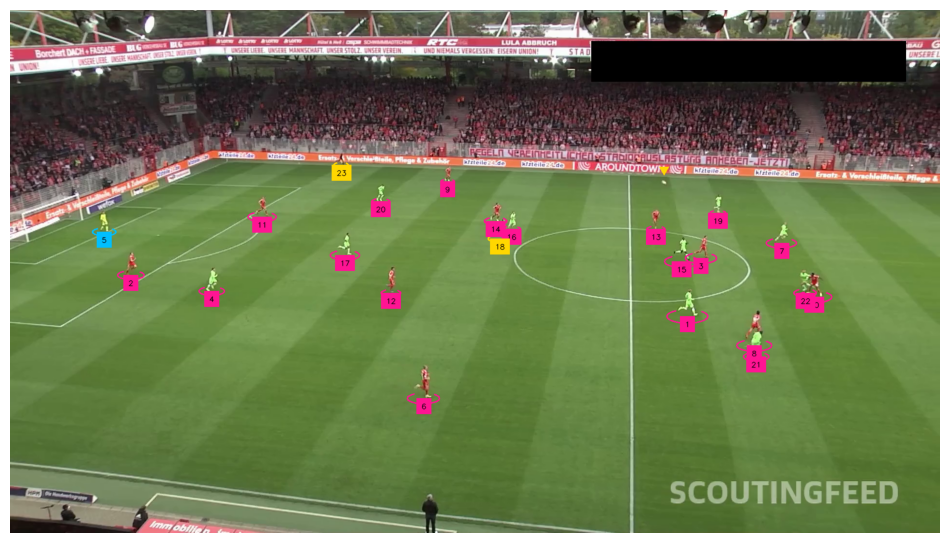

In [11]:
BALL_ID = 0


ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex("#000000"),
    text_position = sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base = 20, height = 17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = model(frame, conf = 0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px = 10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(all_detections)

labels = [
    f"{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)





In [12]:
import argparse
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2

def track_players_distance_to_ball(model_path: str, source_video_path: str, target_video_path: str,
                                    confidence_threshold: float, divider: float):
    """
    Detect players in a video, calculate the distance between each player and a ball,
    and annotate the results in the video using a YOLO model.

    Parameters:
    model_path (str): Path to the YOLO model file.
    source_video_path (str): Path to the input video file.
    target_video_path (str): Path to save the annotated video.
    confidence_threshold (float): Confidence threshold for detections.
    divider (float): Conversion factor from pixels to meters for distance calculation.
    """
    try:
        # Load the YOLO model
        model = YOLO(model_path)

        # Create annotators for bounding boxes, traces, and labels
        ellipse_annotator = sv.EllipseAnnotator(
            color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
            thickness=2
        )
        trace_annotator = sv.TraceAnnotator(
            color=sv.ColorPalette.from_hex(['#FF1493']),
            thickness=2
        )
        triangle_annotator = sv.TriangleAnnotator(
            color=sv.Color.from_hex('#FFD700'),
            base=20, height=17
        )
        label_annotator = sv.LabelAnnotator(
            color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
            text_color=sv.Color.from_hex("#000000"),
            text_position=sv.Position.BOTTOM_CENTER
        )


        # Retrieve video information and initialize frame generator
        video_info = sv.VideoInfo.from_video_path(video_path=source_video_path)
        frames_generator = sv.get_video_frames_generator(source_path=source_video_path)

        # Initialize a ByteTrack tracker for player tracking
        tracker = sv.ByteTrack()
        tracker.reset()
        # Open the video sink for writing annotated frames
        with sv.VideoSink(target_path=target_video_path, video_info=video_info) as sink:
            for frame in frames_generator:
                # Run YOLO model on the current frame
                result = model(frame, conf=confidence_threshold)[0]

                # Convert YOLO detections to a format usable by supervision
                detections = sv.Detections.from_ultralytics(result)

                # Update detections with the tracker
                detections = tracker.update_with_detections(detections)

                # Separate ball and player detections
                ball_detections = detections[detections.class_id == 0]
                player_detections = detections[detections.class_id == 2]
                player_detections = player_detections.with_nms(threshold=0.5, class_agnostic=True)

                labels = [
                    f"{tracker_id}"
                    for tracker_id
                    in player_detections.tracker_id
                ]

                # Annotate the frame with traces, bounding boxes, and labels
                annotated_frame = trace_annotator.annotate(
                    scene=frame.copy(),
                    detections=ball_detections
                )
                annotated_frame = ellipse_annotator.annotate(annotated_frame, player_detections)
                annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
                annotated_frame = label_annotator.annotate(annotated_frame, player_detections, labels=labels)
                # If ball detections are present
                if len(ball_detections) > 0:
                    # Select the first detected ball (assuming there's only one ball)
                    ball_bbox = ball_detections.xyxy[0]
                    ball_center = np.array([
                        (ball_bbox[0] + ball_bbox[2]) / 2,
                        (ball_bbox[1] + ball_bbox[3]) / 2
                    ])

                    # Calculate distances from the ball to each player
                    for player_bbox in player_detections.xyxy:
                        player_center = np.array([
                            (player_bbox[0] + player_bbox[2]) / 2,
                            (player_bbox[1] + player_bbox[3]) / 2
                        ])
                        distance = np.linalg.norm(ball_center - player_center)
                        distance_meters = distance / divider

                        # Annotate the distance on the frame
                        text = f"Distance: {distance_meters:.2f} meters"
                        cv2.putText(
                            annotated_frame,
                            text,
                            (int(player_center[0]), int(player_center[1] - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.5,
                            (255, 0, 0),
                            1
                        )

                # Write the annotated frame to the video sink
                sink.write_frame(frame=annotated_frame)

    except FileNotFoundError as fnf_error:
        raise FileNotFoundError(f"File not found: {str(fnf_error)}")
    except Exception as e:
        raise RuntimeError(f"An error occurred during video processing. Error: {str(e)}")


track_players_distance_to_ball(model_path = "../models/yolov8x_transfer_based_model.pt", source_video_path=SOURCE_VIDEO_PATH,
                              target_video_path=TARGET_VIDEO_PATH, confi)


usage: ipykernel_launcher.py [-h] --model MODEL --source SOURCE
                             [--target TARGET] [--conf CONF]
                             [--divider DIVIDER]
ipykernel_launcher.py: error: the following arguments are required: --model, --source


SystemExit: 2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path="../models/best.pt", force_reload=True) 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/mikolaj/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-8-23 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce GTX 960, 4028MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [7]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [9]:
framefrom __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any

import cv2

import numpy as np


# geometry utilities


@dataclass(frozen=True)
class Point:
    x: float
    y: float
    
    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)


@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x
    
    @property
    def min_y(self) -> float:
        return self.y
    
    @property
    def max_x(self) -> float:
        return self.x + self.width
    
    @property
    def max_y(self) -> float:
        return self.y + self.height
        
    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)
    
    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding, 
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )
    
    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


# detection utilities


@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, pred: np.ndarray, names: Dict[int, str]) -> List[Detection]:
        result = []
        for x_min, y_min, x_max, y_max, confidence, class_id in pred:
            class_id=int(class_id)
            result.append(Detection(
                rect=Rect(
                    x=float(x_min),
                    y=float(y_min),
                    width=float(x_max - x_min),
                    height=float(y_max - y_min)
                ),
                class_id=class_id,
                class_name=names[class_id],
                confidence=float(confidence)
            ))
        return result


def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection 
        in detections
        if detection.class_name == class_name
    ]


# draw utilities


@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int
        
    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)


def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image


def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image


def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
    return image


def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image


# base annotator
  

@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_ellipse(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image

In [10]:
from typing import Generator
def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


In [11]:

def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.imshow(image[...,::-1])
    plt.show()

In [12]:

# white
BALL_COLOR_HEX = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALL_COLOR_HEX)

# red
GOALKEEPER_COLOR_HEX = "#850101"
GOALKEEPER_COLOR = Color.from_hex_string(GOALKEEPER_COLOR_HEX)

# green
PLAYER_COLOR_HEX = "#00D4BB"
PLAYER_COLOR = Color.from_hex_string(PLAYER_COLOR_HEX)

# yellow
REFEREE_COLOR_HEX = "#FFFF00"
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 4

In [13]:
frame_iterator = iter(generate_frames(video_file="../test_videos/test_video.mp4"))

In [14]:
import matplotlib.pyplot as plt


In [18]:
%matplotlib inline


/home/mikolaj/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


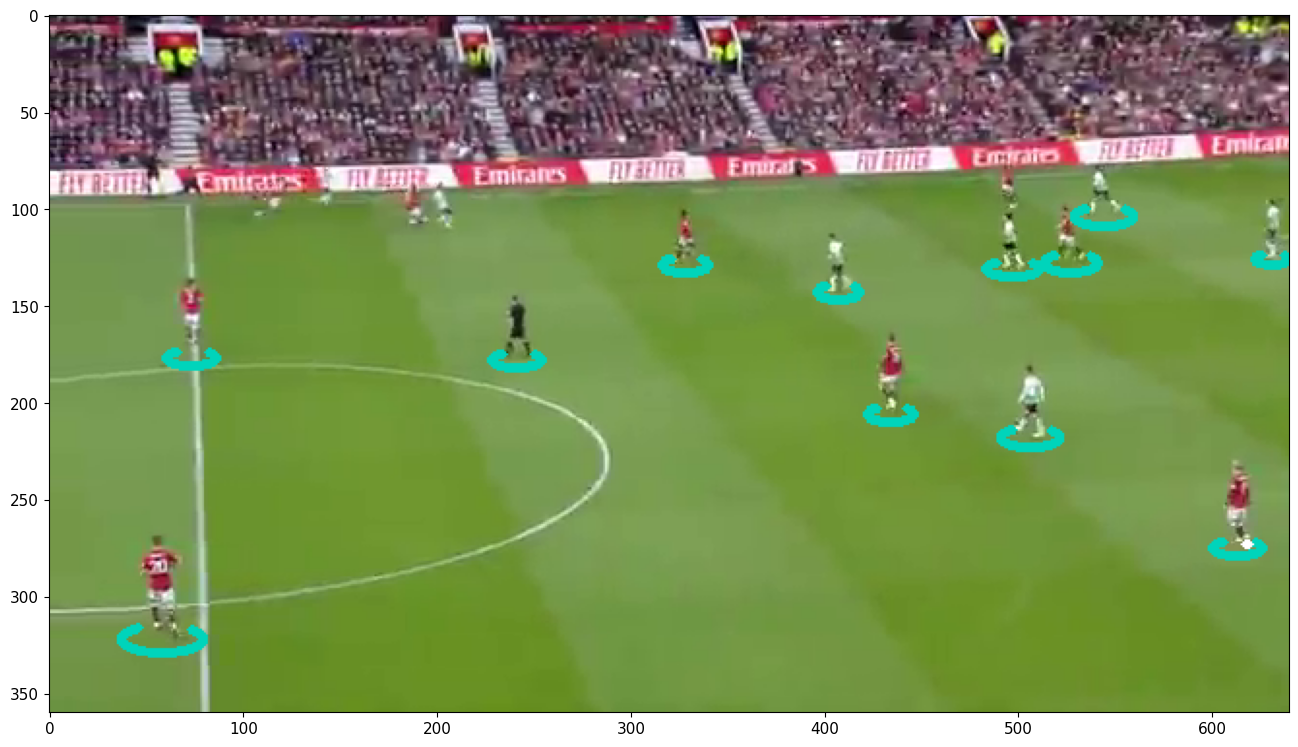

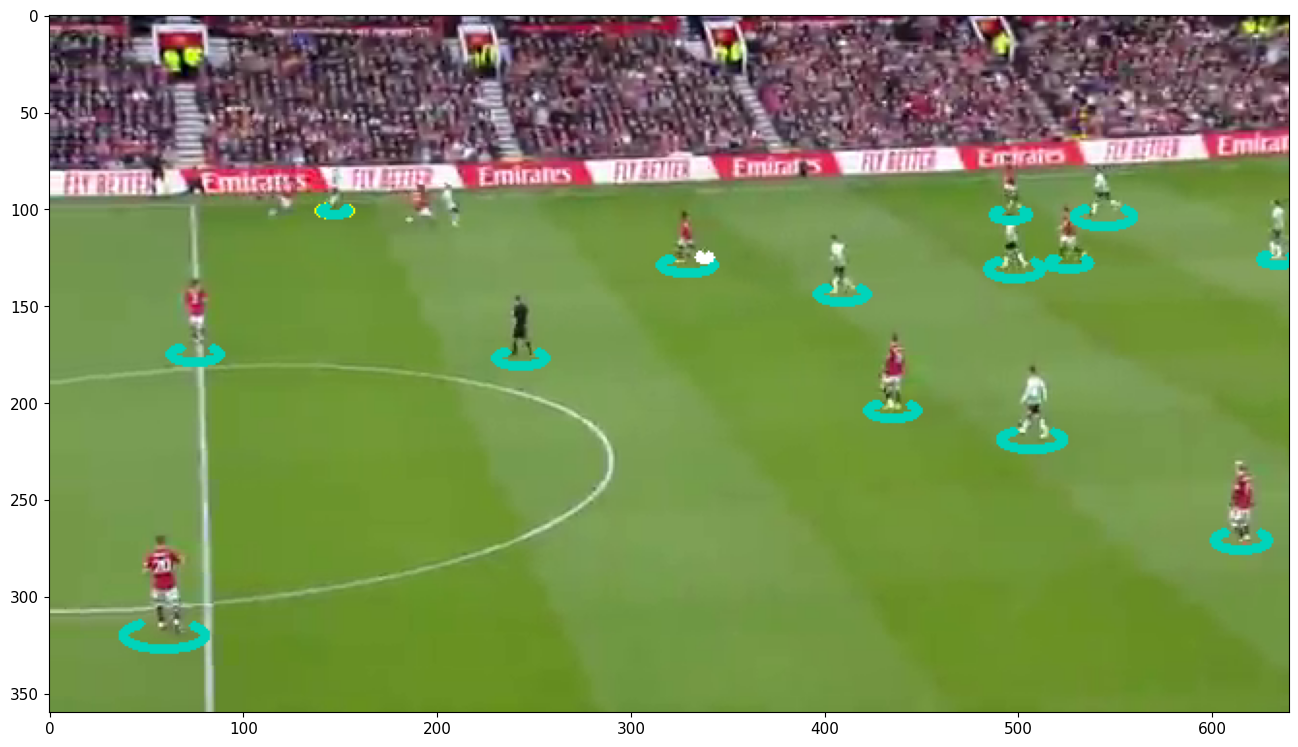

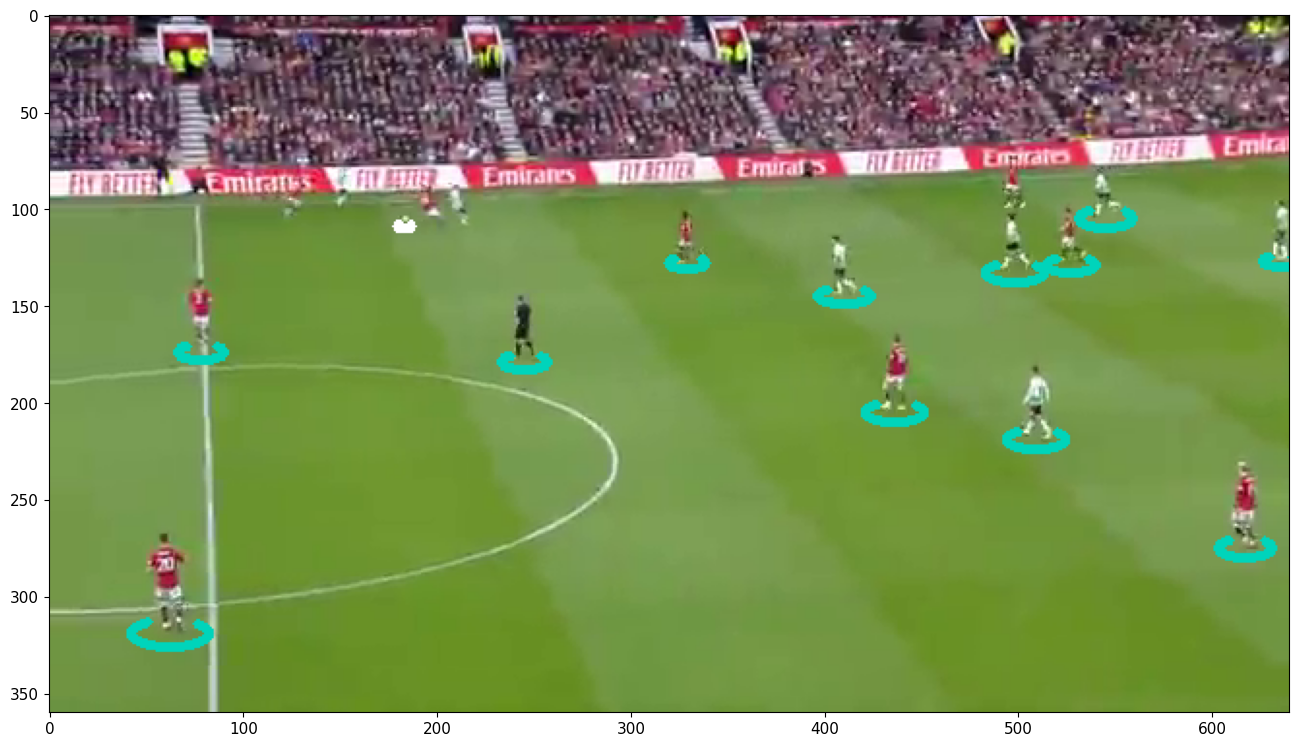

In [19]:
# initiate annotators
annotator = BaseAnnotator(
    colors=COLORS, 
    thickness=THICKNESS)

# acquire video frame
frame = next(frame_iterator)
if frame is None:
    raise ValueError("Frame is None, please check the video source.")
# run detector
results = model(frame, size=1280)
detections = Detection.from_results(
    pred=results.pred[0].cpu().numpy(), 
    names=model.names)

# annotate video frame
annotated_image = annotator.annotate(
    image=frame, 
    detections=detections)

# plot video frame
plot_image(annotated_image, 16)
plt.show()